# CSMODEL Phase 1


<h3 style="color:blue"> Research Question: Are the correlation coefficients between physiochemical properties of acidity and sulphates to the rated quality of red wine significantly more different than correlations coefficients of white wine? </h3>


Roles:
Dataset Description - Ethan, Leomarc <br>
Data Cleaning - Paul, Hans <br>
Exploratory Data Analysis - Hans, Leomarc <br>
Research Questions - Paul, Ethan <br>


<h1 style="color:blue">Introduction: Dataset Description</h1>

**Leomarc:** This project aims to go through and clean a dataset and apply the process of analyzing the data in order to formulate a research question before proceeding to model the data, do hypothesis testing, and extract insights from the data.

Our group's chosen dataset is the [Red and White Wine Quality dataset from Kaggle.](https://www.kaggle.com/datasets/ruthgn/wine-quality-data-set-red-white-wine?select=wine-quality-white-and-red.csv)

This is a Dataset that is a combination of other wine datasets.

The "Red Wine Quality" dataset was compiled in 2009 by Cortez et al. The dataset is mainly utilized for exploring the factors that influence the quality of red wine. The factors that are included are physicochemical properties such as acidity, sugar, pH levels, alcohol content, and others, amounting to 12 different attributes.

Each entry in the dataset represents a variant of the Portuguese "Vinho Verde" wine. The key objective of this dataset is to model wine quality based on these attributes which is mainly quantified through sensory data by scoring the taste between 0 (very bad) and 10 (excellent).

**Hans:** The Red Wine Quality dataset on Kaggle, sourced from the UCI Machine Learning Repository, contains chemical and sensory data on red and white Portuguese Vinho Verde wine. The dataset includes 1,599 instances of red wine and 4,898 instances of white wine. There are 12 input variables such as the type of wine (red/white), fixed acidity, volatile acidity, citric acid, residual sugar, chlorides, free sulfur dioxide, total sulfur dioxide, density, pH, sulphates, and alcohol. The output variable is the wine quality score, ranging from 0 to 10, as determined by wine experts. This dataset is useful for regression, classification, and feature selection tasks, aiding in the analysis and prediction of wine quality based on its chemical properties.


In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns
from scipy.stats import kruskal
from scipy import stats as st
from scipy.stats import pointbiserialr
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


# Reading the dataset

In [2]:
df = pd.DataFrame()
df = pd.read_csv("wine-quality-white-and-red.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [3]:
df.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6497.000000       6497.000000  6497.000000     6497.000000   
mean        7.215307          0.339666     0.318633        5.443235   
std         1.296434          0.164636     0.145318        4.757804   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6497.000000          6497.000000           6497.000000  6497.000000   
mean      0.056034            30.525319            115.744574     0.994697   
std       0.035034            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6497.000000  6497.000000  6497.000000  6497.000000  
mean      3.218501     0.531268    10.491801     5.818378  
std       0.160787     0.148806     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

<h1 style="color:blue">Cleaning the Dataset</h1>


In order to conduct a proper study using the <b>red and white wine dataset</b> it is essential to clean the data and rid the dataset of the following:

- multiple representation of the same categorical value
- incorrect datatype variable
- values that are set to default values of the variable
- missing data
- duplicate data
- inconsistent formatting

For this study, it is only required to clean variables that will utilized in the study; as such the following varibles will be used

- **`fixed acidity`**: collection of volatility organic acids.
- **`volatile acidity`**:
- **`citric acid`**:
- **`residual sugar`**:
- **`chlorides`**:
- **`free sulfer dioxide`**:
- **`total sulfer dioxide`**:
- **`density`**:
- **`pH`**: the potency and concentration of of the dissociated acids in the wine
- **`sulphates`**:
- **`alchohol`**:
- **`quality`**:


# Get the datatypes per column

In [4]:
datatypes = df.dtypes
datatypes

type                     object
fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

# Get the null values per column

In [5]:
df.isnull().sum()

type                    0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

# Drop duplicate values

In [6]:
df = df.drop_duplicates(keep = 'first', inplace = False)
df

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
6     white            6.2             0.320         0.16             7.0   
...     ...            ...               ...          ...             ...   
6491    red            6.8             0.620         0.08             1.9   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0         0.045                 45.0                 170.0  1.00100  3.00   
1         0.049                 14.0                 132.0  0.99400  3.30   
2         0.050                 30.0                  97.0  0.99510  3.26   
3         0.058                 47.0                 186.0  0.99560  3.19   
6         0.045                 30.0                 136.0  0.99490  3.18   
...         ...                  ...                   ...      ...   ...   
6491      0.068                 28.0                  38.0  0.99651  3.42   
6492      0.090                 32.0                  44.0  0.99490  3.45   
6493      0.062                 39.0                  51.0  0.99512  3.52   
6495      0.075                 32.0                  44.0  0.99547  3.57   
6496      0.067                 18.0                  42.0  0.99549  3.39   

      sulphates  alcohol  quality  
0          0.45      8.8        6  
1          0.49      9.5        6  
2          0.44     10.1        6  
3          0.40      9.9        6  
6          0.47      9.6        6  
...         ...      ...      ...  
6491       0.82      9.5        6  
6492       0.58     10.5        5  
6493       0.76     11.2        6  
6495       0.71     10.2        5  
6496       0.66     11.0        6  

[5320 rows x 13 columns]

As of the table above, no notable deletions occured. no duplicated row were found.

### **`fixed acidity`** variable

In [7]:
val = df["fixed acidity"].unique()
val.sort()
print(val)
print(len(val))

[ 3.8   3.9   4.2   4.4   4.5   4.6   4.7   4.8   4.9   5.    5.1   5.2
  5.3   5.4   5.5   5.6   5.7   5.8   5.9   6.    6.1   6.15  6.2   6.3
  6.4   6.45  6.5   6.6   6.7   6.8   6.9   7.    7.1   7.15  7.2   7.3
  7.4   7.5   7.6   7.7   7.8   7.9   8.    8.1   8.2   8.3   8.4   8.5
  8.6   8.7   8.8   8.9   9.    9.1   9.2   9.3   9.4   9.5   9.6   9.7
  9.8   9.9  10.   10.1  10.2  10.3  10.4  10.5  10.6  10.7  10.8  10.9
 11.   11.1  11.2  11.3  11.4  11.5  11.6  11.7  11.8  11.9  12.   12.1
 12.2  12.3  12.4  12.5  12.6  12.7  12.8  12.9  13.   13.2  13.3  13.4
 13.5  13.7  13.8  14.   14.2  14.3  15.   15.5  15.6  15.9 ]
106


In [8]:
df['fixed acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`fixed acidity`** column

therefore, we can conclude that the **`fixed acidity`** column is clean

### **`volatile acidity`** variable



In [9]:
val = df['volatile acidity'].unique()
val.sort()
print(val)
print(len(val))

[0.08  0.085 0.09  0.1   0.105 0.11  0.115 0.12  0.125 0.13  0.135 0.14
 0.145 0.15  0.155 0.16  0.165 0.17  0.175 0.18  0.185 0.19  0.2   0.205
 0.21  0.215 0.22  0.225 0.23  0.235 0.24  0.245 0.25  0.255 0.26  0.265
 0.27  0.275 0.28  0.285 0.29  0.295 0.3   0.305 0.31  0.315 0.32  0.325
 0.33  0.335 0.34  0.345 0.35  0.355 0.36  0.365 0.37  0.375 0.38  0.385
 0.39  0.395 0.4   0.405 0.41  0.415 0.42  0.425 0.43  0.435 0.44  0.445
 0.45  0.455 0.46  0.47  0.475 0.48  0.485 0.49  0.495 0.5   0.51  0.52
 0.53  0.54  0.545 0.55  0.555 0.56  0.565 0.57  0.575 0.58  0.585 0.59
 0.595 0.6   0.605 0.61  0.615 0.62  0.625 0.63  0.635 0.64  0.645 0.65
 0.655 0.66  0.665 0.67  0.675 0.68  0.685 0.69  0.695 0.7   0.705 0.71
 0.715 0.72  0.725 0.73  0.735 0.74  0.745 0.75  0.755 0.76  0.765 0.77
 0.775 0.78  0.785 0.79  0.795 0.8   0.805 0.81  0.815 0.82  0.825 0.83
 0.835 0.84  0.845 0.85  0.855 0.86  0.865 0.87  0.875 0.88  0.885 0.89
 0.895 0.9   0.905 0.91  0.915 0.92  0.93  0.935 0.95  0.95

In [10]:
df['volatile acidity'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`volatile acidity`** column

therefore, we can conclude that the **`volatile acidity`** column is clean

### **`citric acid`** variable

In [11]:
val = df['citric acid'].unique()
val.sort()
print(val)
print(len(val))

[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4  0.41
 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5  0.51 0.52 0.53 0.54 0.55
 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69
 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.78 0.79 0.8  0.81 0.82 0.86 0.88
 0.91 0.99 1.   1.23 1.66]
89


In [12]:
df['citric acid'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`citric acid`** column

therefore, we can conclude that the **`citric acid`** column is clean

### **`residual sugar`** variable

In [13]:
val = df['residual sugar'].unique()
val.sort()
print(val)
print(len(val))

[ 0.6   0.7   0.8   0.9   0.95  1.    1.05  1.1   1.15  1.2   1.25  1.3
  1.35  1.4   1.45  1.5   1.55  1.6   1.65  1.7   1.75  1.8   1.85  1.9
  1.95  2.    2.05  2.1   2.15  2.2   2.25  2.3   2.35  2.4   2.5   2.55
  2.6   2.65  2.7   2.8   2.85  2.9   2.95  3.    3.1   3.15  3.2   3.3
  3.4   3.45  3.5   3.6   3.65  3.7   3.75  3.8   3.85  3.9   3.95  4.
  4.1   4.2   4.25  4.3   4.35  4.4   4.45  4.5   4.55  4.6   4.65  4.7
  4.75  4.8   4.85  4.9   5.    5.1   5.15  5.2   5.25  5.3   5.35  5.4
  5.45  5.5   5.55  5.6   5.7   5.8   5.85  5.9   5.95  6.    6.1   6.2
  6.3   6.35  6.4   6.5   6.55  6.6   6.65  6.7   6.75  6.8   6.85  6.9
  6.95  7.    7.05  7.1   7.2   7.25  7.3   7.35  7.4   7.45  7.5   7.6
  7.7   7.75  7.8   7.85  7.9   7.95  8.    8.1   8.15  8.2   8.25  8.3
  8.4   8.45  8.5   8.55  8.6   8.65  8.7   8.75  8.8   8.9   8.95  9.
  9.05  9.1   9.15  9.2   9.25  9.3   9.4   9.5   9.55  9.6   9.65  9.7
  9.8   9.85  9.9  10.   10.05 10.1  10.2  10.3  10.4  10.5  10.5

In [14]:
df['residual sugar'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`residual sugar`** column

therefore, we can conclude that the **`residual sugar`** column is clean

### **`chlorides`** variable

In [15]:
val = df['chlorides'].unique()
val.sort()
print(val)
print(len(val))

[0.009 0.012 0.013 0.014 0.015 0.016 0.017 0.018 0.019 0.02  0.021 0.022
 0.023 0.024 0.025 0.026 0.027 0.028 0.029 0.03  0.031 0.032 0.033 0.034
 0.035 0.036 0.037 0.038 0.039 0.04  0.041 0.042 0.043 0.044 0.045 0.046
 0.047 0.048 0.049 0.05  0.051 0.052 0.053 0.054 0.055 0.056 0.057 0.058
 0.059 0.06  0.061 0.062 0.063 0.064 0.065 0.066 0.067 0.068 0.069 0.07
 0.071 0.072 0.073 0.074 0.075 0.076 0.077 0.078 0.079 0.08  0.081 0.082
 0.083 0.084 0.085 0.086 0.087 0.088 0.089 0.09  0.091 0.092 0.093 0.094
 0.095 0.096 0.097 0.098 0.099 0.1   0.101 0.102 0.103 0.104 0.105 0.106
 0.107 0.108 0.109 0.11  0.111 0.112 0.113 0.114 0.115 0.116 0.117 0.118
 0.119 0.12  0.121 0.122 0.123 0.124 0.125 0.126 0.127 0.128 0.13  0.132
 0.133 0.135 0.136 0.137 0.138 0.142 0.143 0.144 0.145 0.146 0.147 0.148
 0.149 0.15  0.152 0.153 0.154 0.156 0.157 0.158 0.159 0.16  0.161 0.165
 0.166 0.167 0.168 0.169 0.17  0.171 0.172 0.173 0.174 0.175 0.176 0.178
 0.179 0.18  0.184 0.185 0.186 0.19  0.194 0.197 0.2

In [16]:
df['chlorides'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`chlorides`** column

therefore, we can conclude that the **`chlorides`** column is clean

### **`free sulfur dioxide`** variable

In [17]:
val = df['free sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[  1.    2.    3.    4.    5.    5.5   6.    7.    8.    9.   10.   11.
  11.5  12.   13.   14.   15.   15.5  16.   17.   18.   19.   19.5  20.
  21.   22.   23.   23.5  24.   25.   26.   27.   28.   28.5  29.   30.
  30.5  31.   32.   33.   34.   35.   35.5  36.   37.   37.5  38.   38.5
  39.   39.5  40.   40.5  41.   41.5  42.   42.5  43.   43.5  44.   44.5
  45.   46.   47.   48.   48.5  49.   50.   50.5  51.   51.5  52.   52.5
  53.   54.   55.   56.   57.   58.   59.   59.5  60.   60.5  61.   61.5
  62.   63.   64.   64.5  65.   66.   67.   68.   69.   70.   70.5  71.
  72.   73.   73.5  74.   75.   76.   77.   77.5  78.   79.   79.5  80.
  81.   82.   82.5  83.   85.   86.   87.   88.   89.   93.   95.   96.
  97.   98.  101.  105.  108.  110.  112.  118.5 122.5 124.  128.  131.
 138.5 146.5 289. ]
135


In [18]:
df['free sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`free sulfur dioxide`** column

therefore, we can conclude that the **`free sulfur dioxide`** column is clean

### **`total sulfer dioxide`** variable

In [19]:
val = df['total sulfur dioxide'].unique()
val.sort()
print(val)
print(len(val))

[  6.    7.    8.    9.   10.   11.   12.   13.   14.   15.   16.   17.
  18.   19.   20.   21.   22.   23.   24.   25.   26.   27.   28.   29.
  30.   31.   32.   33.   34.   35.   36.   37.   38.   39.   40.   41.
  42.   43.   44.   45.   46.   47.   48.   49.   50.   51.   52.   53.
  54.   55.   56.   57.   58.   59.   60.   61.   62.   63.   64.   65.
  66.   67.   68.   69.   70.   71.   72.   73.   74.   75.   76.   77.
  77.5  78.   79.   80.   81.   82.   83.   84.   85.   86.   87.   88.
  89.   90.   91.   92.   93.   94.   95.   96.   97.   98.   99.  100.
 101.  102.  103.  104.  105.  106.  107.  108.  109.  110.  111.  112.
 113.  114.  115.  115.5 116.  117.  118.  119.  120.  121.  122.  123.
 124.  125.  126.  127.  128.  129.  129.5 130.  131.  132.  133.  134.
 135.  136.  137.  138.  139.  140.  141.  142.  143.  144.  145.  146.
 147.  148.  149.  150.  151.  152.  153.  154.  155.  156.  157.  158.
 159.  160.  161.  162.  162.5 163.  164.  164.5 165.  166.  167

In [20]:
df['total sulfur dioxide'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`total sulfur dioxide`** column

therefore, we can conclude that the **`total sulfur dioxide`** column is clean

### **`density`** variable

In [21]:
val = df['density'].unique()
val.sort()
print(val)
print(len(val))

[0.98711  0.98713  0.98722  0.9874   0.98742  0.98746  0.98758  0.98774
 0.98779  0.98794  0.98802  0.98815  0.98816  0.98819  0.98822  0.98823
 0.988245 0.98834  0.98836  0.9884   0.98845  0.98853  0.98854  0.98856
 0.9886   0.98862  0.98865  0.98867  0.98868  0.98869  0.9887   0.98871
 0.98872  0.98876  0.98878  0.9888   0.98882  0.98883  0.98884  0.98886
 0.98889  0.9889   0.98892  0.98894  0.98895  0.98896  0.98898  0.989
 0.98902  0.98904  0.98906  0.9891   0.98912  0.98913  0.98914  0.98915
 0.98916  0.98918  0.98919  0.9892   0.98922  0.98923  0.98924  0.98926
 0.98928  0.9893   0.98931  0.989315 0.98934  0.98935  0.98936  0.98938
 0.98939  0.9894   0.98941  0.98942  0.989435 0.98944  0.98945  0.98946
 0.989465 0.98947  0.98948  0.98949  0.9895   0.98951  0.98952  0.98953
 0.98954  0.98956  0.98958  0.98959  0.9896   0.98961  0.98962  0.98963
 0.98964  0.98965  0.98966  0.98968  0.9897   0.98972  0.98974  0.98975
 0.98976  0.98978  0.9898   0.98981  0.98982  0.98984  0.98985  0.

In [22]:
df['density'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`density`** column

therefore, we can conclude that the **`density`** column is clean

### **`pH`** variable

In [23]:
val = df["pH"].unique()
val.sort()
print(val)
print(len(val))

[2.72 2.74 2.77 2.79 2.8  2.82 2.83 2.84 2.85 2.86 2.87 2.88 2.89 2.9
 2.91 2.92 2.93 2.94 2.95 2.96 2.97 2.98 2.99 3.   3.01 3.02 3.03 3.04
 3.05 3.06 3.07 3.08 3.09 3.1  3.11 3.12 3.13 3.14 3.15 3.16 3.17 3.18
 3.19 3.2  3.21 3.22 3.23 3.24 3.25 3.26 3.27 3.28 3.29 3.3  3.31 3.32
 3.33 3.34 3.35 3.36 3.37 3.38 3.39 3.4  3.41 3.42 3.43 3.44 3.45 3.46
 3.47 3.48 3.49 3.5  3.51 3.52 3.53 3.54 3.55 3.56 3.57 3.58 3.59 3.6
 3.61 3.62 3.63 3.64 3.65 3.66 3.67 3.68 3.69 3.7  3.71 3.72 3.74 3.75
 3.76 3.77 3.78 3.79 3.8  3.81 3.82 3.85 3.9  4.01]
108


In [24]:
df['pH'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`pH`** column

therefore, we can conclude that the **`pH`** column is clean

### **`sulphates`** variable

In [25]:
val = df['sulphates'].unique()
val.sort()
print(val)
print(len(val))

[0.22 0.23 0.25 0.26 0.27 0.28 0.29 0.3  0.31 0.32 0.33 0.34 0.35 0.36
 0.37 0.38 0.39 0.4  0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5
 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6  0.61 0.62 0.63 0.64
 0.65 0.66 0.67 0.68 0.69 0.7  0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78
 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92
 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.   1.01 1.02 1.03 1.04 1.05 1.06
 1.07 1.08 1.09 1.1  1.11 1.12 1.13 1.14 1.15 1.16 1.17 1.18 1.2  1.22
 1.26 1.28 1.31 1.33 1.34 1.36 1.56 1.59 1.61 1.62 1.95 1.98 2.  ]
111


In [26]:
df['sulphates'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`sulphates`** column

therefore, we can conclude that the **`sulphates`** column is clean

### **`alcohol`** variable

In [27]:
val = df['alcohol'].unique()
val.sort()
print(val)
print(len(val))

[ 8.          8.4         8.5         8.6         8.7         8.8
  8.9         9.          9.05        9.1         9.2         9.23333333
  9.25        9.3         9.4         9.5         9.53333333  9.55
  9.56666667  9.6         9.63333333  9.7         9.73333333  9.75
  9.8         9.9         9.95       10.         10.03333333 10.1
 10.13333333 10.15       10.2        10.3        10.4        10.46666667
 10.5        10.53333333 10.55       10.56666667 10.6        10.65
 10.7        10.75       10.8        10.9        10.93333333 10.96666667
 10.98       11.         11.05       11.06666667 11.1        11.2
 11.26666667 11.3        11.33333333 11.35       11.36666667 11.4
 11.43333333 11.45       11.46666667 11.5        11.55       11.6
 11.63333333 11.65       11.7        11.73333333 11.75       11.8
 11.85       11.9        11.94       11.95       12.         12.05
 12.06666667 12.1        12.15       12.2        12.25       12.3
 12.33333333 12.4        12.5        12.6        12

In [28]:
df['alcohol'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`alcohol`** column

therefore, we can conclude that the **`alcohol`** column is clean

### **`quality`** variable

In [29]:
val = df['quality'].unique()
val.sort()
print(val)
print(len(val))

[3 4 5 6 7 8 9]
7


In [30]:
df['quality'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`quality`** column is clean

### **`type`** variable

In [31]:
val = df['type'].unique()
val.sort()
print(val)
print(len(val))

['red' 'white']
2


In [32]:
df['type'].isnull().sum()

0

Based on looking at the results of the previous code, it is evident that there are no <i>**null**</i> values and <i>**multiple representation**</i> in the **`quality`** column

therefore, we can conclude that the **`type`** column is clean

<h1 style="color:blue">Exploratory Data Analysis</h1>



In [33]:
columns = df.columns
columns = set(columns) - set(['quality'])
columns

{'alcohol',
 'chlorides',
 'citric acid',
 'density',
 'fixed acidity',
 'free sulfur dioxide',
 'pH',
 'residual sugar',
 'sulphates',
 'total sulfur dioxide',
 'type',
 'volatile acidity'}

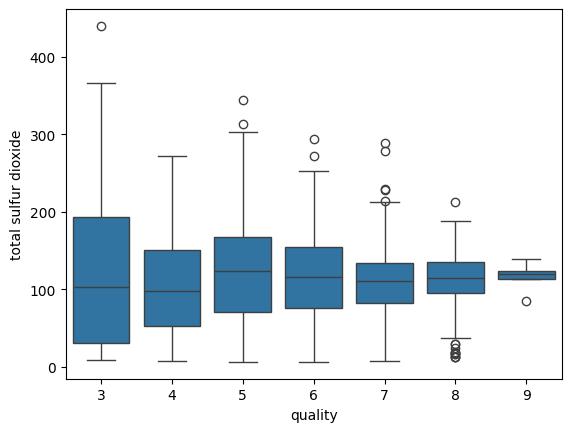

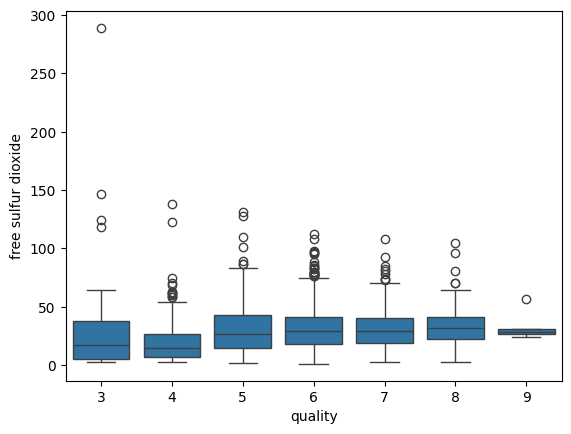

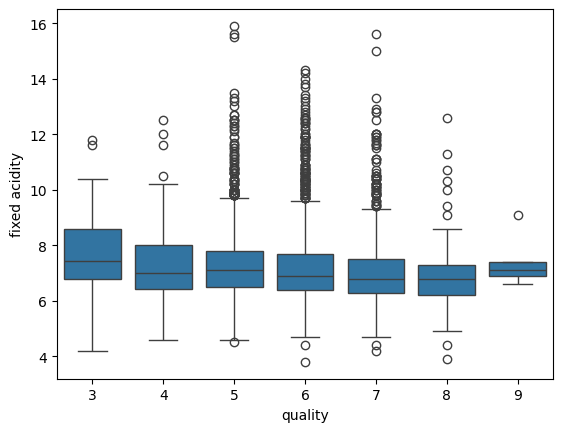

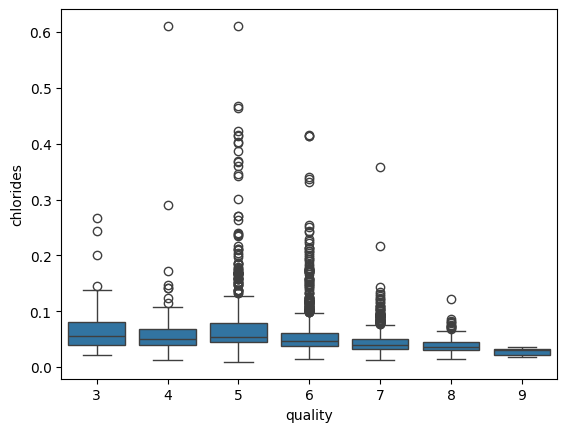

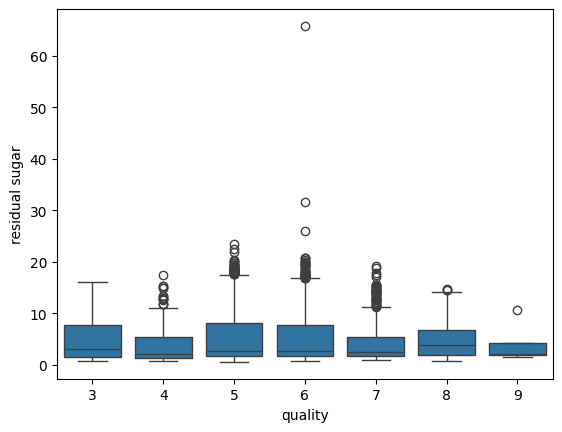

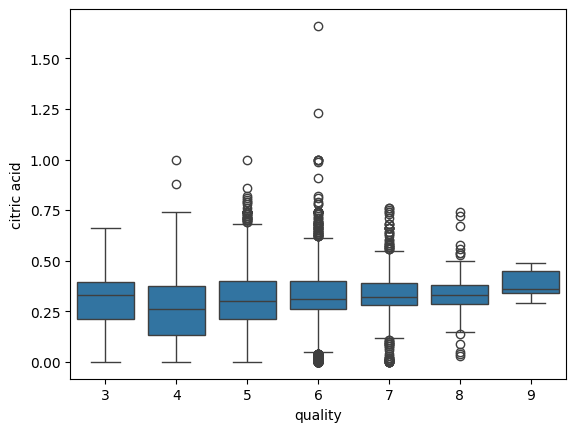

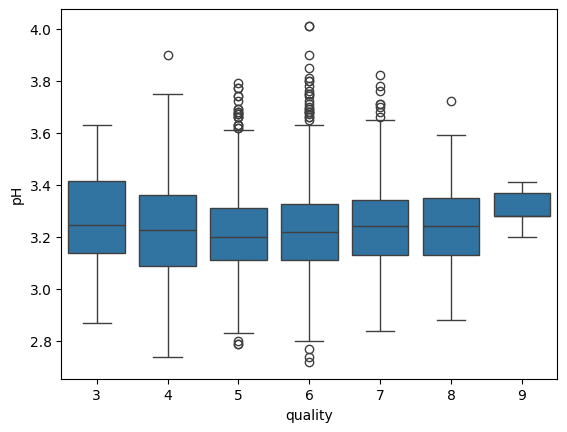

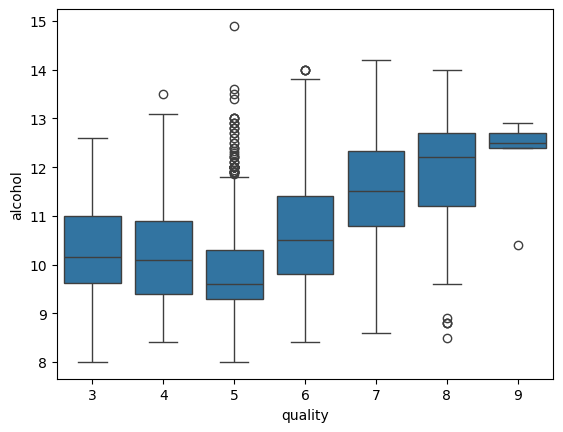

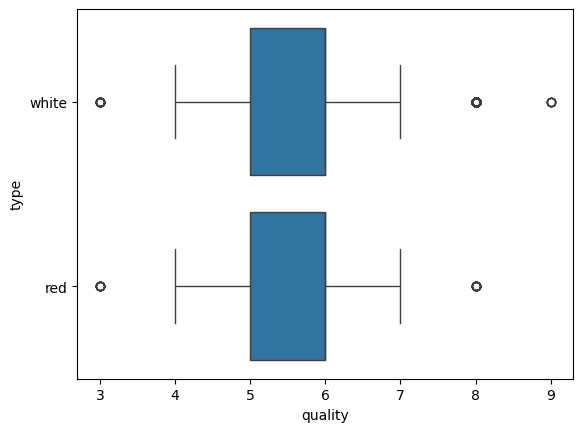

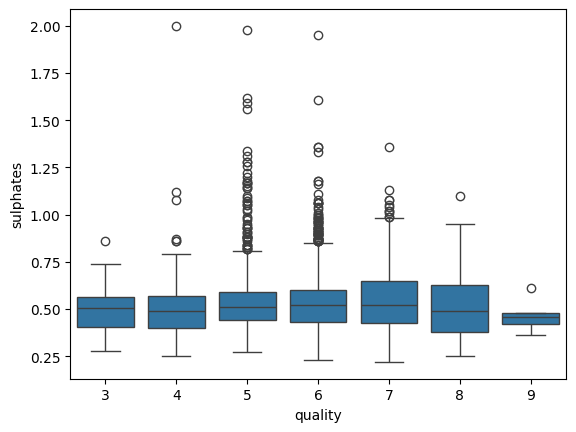

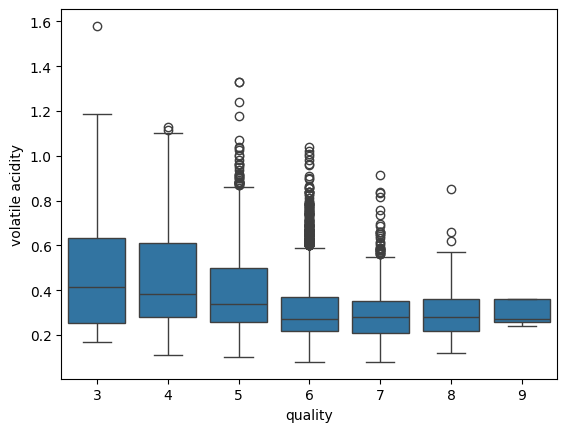

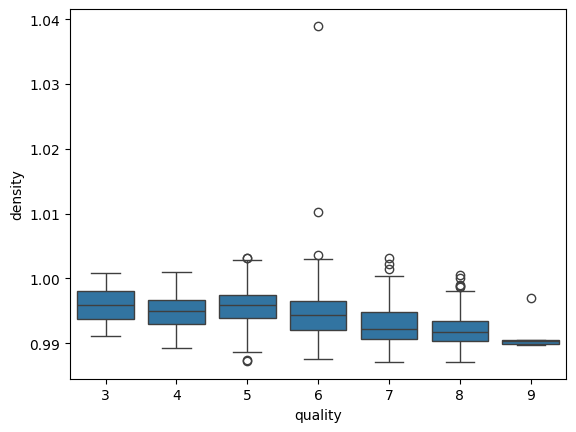

In [34]:
for col in columns:
    sns.boxplot(df, x = 'quality', y = col)
    plt.show()

## **`Finding Correlations`**

## 1.) Do any of the assumed independent variables have a correlation to the quality of the wine?

In [35]:
correlation_matrix = df[df.columns[1:]].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000            0.215       0.330   
volatile acidity             0.215            1.000      -0.384   
citric acid                  0.330           -0.384       1.000   
residual sugar              -0.104           -0.164       0.146   
chlorides                    0.289            0.368       0.055   
free sulfur dioxide         -0.282           -0.349       0.131   
total sulfur dioxide        -0.327           -0.401       0.195   
density                      0.478            0.308       0.095   
pH                          -0.271            0.247      -0.345   
sulphates                    0.305            0.228       0.059   
alcohol                     -0.103           -0.065      -0.005   
quality                     -0.080           -0.265       0.098   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                -0.104     0.289              -0.282   
volatile acidity             -0.164     0.368              -0.349   
citric acid                   0.146     0.055               0.131   
residual sugar                1.000    -0.123               0.399   
chlorides                    -0.123     1.000              -0.187   
free sulfur dioxide           0.399    -0.187               1.000   
total sulfur dioxide          0.488    -0.270               0.720   
density                       0.521     0.372               0.006   
pH                           -0.235     0.026              -0.142   
sulphates                    -0.175     0.405              -0.198   
alcohol                      -0.305    -0.270              -0.170   
quality                      -0.057    -0.202               0.054   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                      -0.327   0.478  -0.271     0.305  -0.103   
volatile acidity                   -0.401   0.308   0.247     0.228  -0.065   
citric acid                         0.195   0.095  -0.345     0.059  -0.005   
residual sugar                      0.488   0.521  -0.235    -0.175  -0.305   
chlorides                          -0.270   0.372   0.026     0.405  -0.270   
free sulfur dioxide                 0.720   0.006  -0.142    -0.198  -0.170   
total sulfur dioxide                1.000   0.007  -0.223    -0.276  -0.249   
density                             0.007   1.000   0.034     0.283  -0.668   
pH                                 -0.223   0.034   1.000     0.168   0.097   
sulphates                          -0.276   0.283   0.168     1.000  -0.017   
alcohol                            -0.249  -0.668   0.097    -0.017   1.000   
quality                            -0.050  -0.326   0.040     0.042   0.469   

                     quality  
fixed acidity         -0.080  
volatile acidity      -0.265  
citric acid            0.098  
residual sugar        -0.057  
chlorides             -0.202  
free sulfur dioxide    0.054  
total sulfur dioxide  -0.050  
density               -0.326  
pH                     0.040  
sulphates              0.042  
alcohol                0.469  
quality                1.000

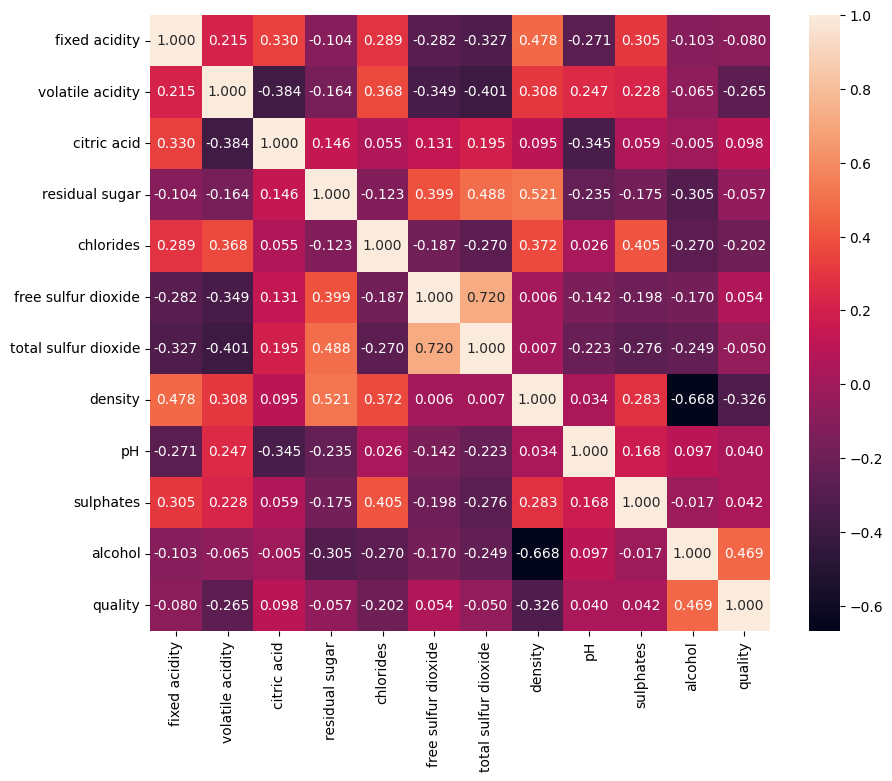

In [36]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

Looking at the heatmap for the entire red and white wine dataset, it seems that only alcohol has a correlation to the quality of wine.

However, we can investigate more on this by analyzing the features by its group. (red and white wine respectively)

## 2.) Are any of the independent variables correlated to the quality of the wine? (grouped by type: white and red)

In [37]:
columns_notype = df.columns[1:]
df_white = df[df.type=="white"].copy()
df_red = df[df.type=="red"].copy()

In [38]:
correlation_matrix = df_white[columns_notype].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.019       0.299   
volatile acidity            -0.019            1.000      -0.163   
citric acid                  0.299           -0.163       1.000   
residual sugar               0.084            0.098       0.106   
chlorides                    0.024            0.086       0.133   
free sulfur dioxide         -0.058           -0.102       0.092   
total sulfur dioxide         0.082            0.102       0.123   
density                      0.266            0.061       0.160   
pH                          -0.431           -0.047      -0.183   
sulphates                   -0.017           -0.021       0.049   
alcohol                     -0.111            0.047      -0.077   
quality                     -0.125           -0.191       0.007   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                 0.084     0.024              -0.058   
volatile acidity              0.098     0.086              -0.102   
citric acid                   0.106     0.133               0.092   
residual sugar                1.000     0.076               0.307   
chlorides                     0.076     1.000               0.101   
free sulfur dioxide           0.307     0.101               1.000   
total sulfur dioxide          0.410     0.191               0.619   
density                       0.820     0.253               0.295   
pH                           -0.166    -0.091              -0.008   
sulphates                    -0.021     0.018               0.038   
alcohol                      -0.398    -0.357              -0.252   
quality                      -0.117    -0.218               0.011   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                       0.082   0.266  -0.431    -0.017  -0.111   
volatile acidity                    0.102   0.061  -0.047    -0.021   0.047   
citric acid                         0.123   0.160  -0.183     0.049  -0.077   
residual sugar                      0.410   0.820  -0.166    -0.021  -0.398   
chlorides                           0.191   0.253  -0.091     0.018  -0.357   
free sulfur dioxide                 0.619   0.295  -0.008     0.038  -0.252   
total sulfur dioxide                1.000   0.537   0.008     0.137  -0.447   
density                             0.537   1.000  -0.064     0.082  -0.760   
pH                                  0.008  -0.064   1.000     0.142   0.093   
sulphates                           0.137   0.082   0.142     1.000  -0.023   
alcohol                            -0.447  -0.760   0.093    -0.023   1.000   
quality                            -0.183  -0.338   0.124     0.053   0.463   

                     quality  
fixed acidity         -0.125  
volatile acidity      -0.191  
citric acid            0.007  
residual sugar        -0.117  
chlorides             -0.218  
free sulfur dioxide    0.011  
total sulfur dioxide  -0.183  
density               -0.338  
pH                     0.124  
sulphates              0.053  
alcohol                0.463  
quality                1.000

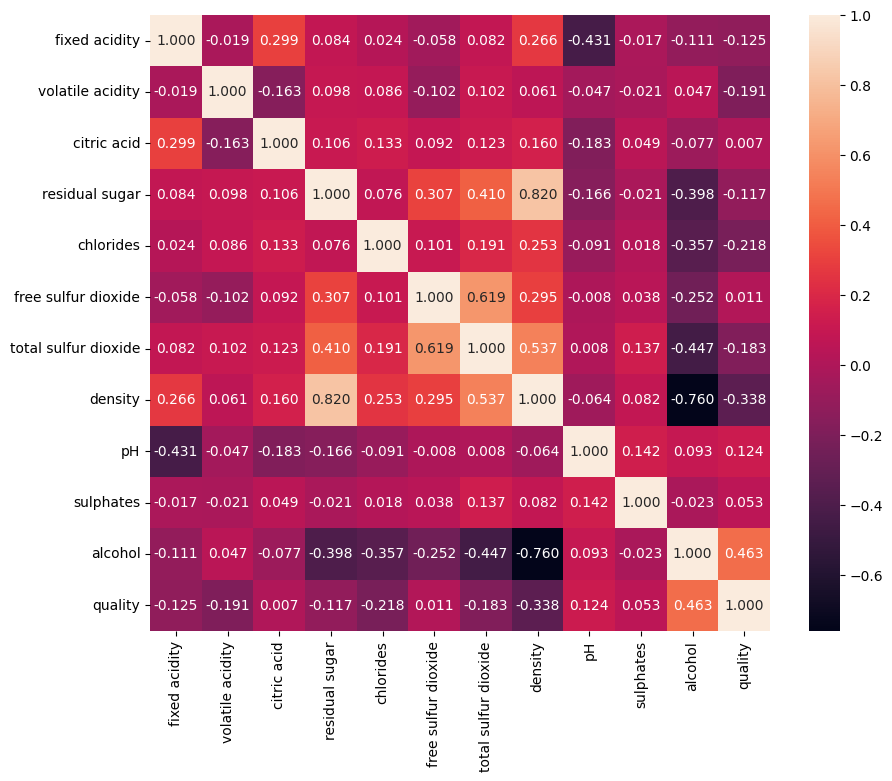

In [39]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

In [40]:
correlation_matrix = df_red[columns_notype].corr()
formatted_matrix = correlation_matrix.applymap(lambda x: f"{x:.3f}")
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.255       0.667   
volatile acidity            -0.255            1.000      -0.551   
citric acid                  0.667           -0.551       1.000   
residual sugar               0.111           -0.002       0.144   
chlorides                    0.086            0.055       0.210   
free sulfur dioxide         -0.141           -0.021      -0.048   
total sulfur dioxide        -0.104            0.072       0.047   
density                      0.670            0.024       0.358   
pH                          -0.687            0.247      -0.550   
sulphates                    0.190           -0.257       0.326   
alcohol                     -0.062           -0.198       0.105   
quality                      0.119           -0.395       0.228   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                 0.111     0.086              -0.141   
volatile acidity             -0.002     0.055              -0.021   
citric acid                   0.144     0.210              -0.048   
residual sugar                1.000     0.027               0.161   
chlorides                     0.027     1.000               0.001   
free sulfur dioxide           0.161     0.001               1.000   
total sulfur dioxide          0.201     0.046               0.667   
density                       0.325     0.194              -0.018   
pH                           -0.083    -0.271               0.057   
sulphates                    -0.012     0.395               0.054   
alcohol                       0.063    -0.224              -0.080   
quality                       0.014    -0.131              -0.050   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                      -0.104   0.670  -0.687     0.190  -0.062   
volatile acidity                    0.072   0.024   0.247    -0.257  -0.198   
citric acid                         0.047   0.358  -0.550     0.326   0.105   
residual sugar                      0.201   0.325  -0.083    -0.012   0.063   
chlorides                           0.046   0.194  -0.271     0.395  -0.224   
free sulfur dioxide                 0.667  -0.018   0.057     0.054  -0.080   
total sulfur dioxide                1.000   0.078  -0.079     0.035  -0.218   
density                             0.078   1.000  -0.356     0.146  -0.505   
pH                                 -0.079  -0.356   1.000    -0.214   0.213   
sulphates                           0.035   0.146  -0.214     1.000   0.092   
alcohol                            -0.218  -0.505   0.213     0.092   1.000   
quality                            -0.178  -0.184  -0.055     0.249   0.480   

                     quality  
fixed acidity          0.119  
volatile acidity      -0.395  
citric acid            0.228  
residual sugar         0.014  
chlorides             -0.131  
free sulfur dioxide   -0.050  
total sulfur dioxide  -0.178  
density               -0.184  
pH                    -0.055  
sulphates              0.249  
alcohol                0.480  
quality                1.000

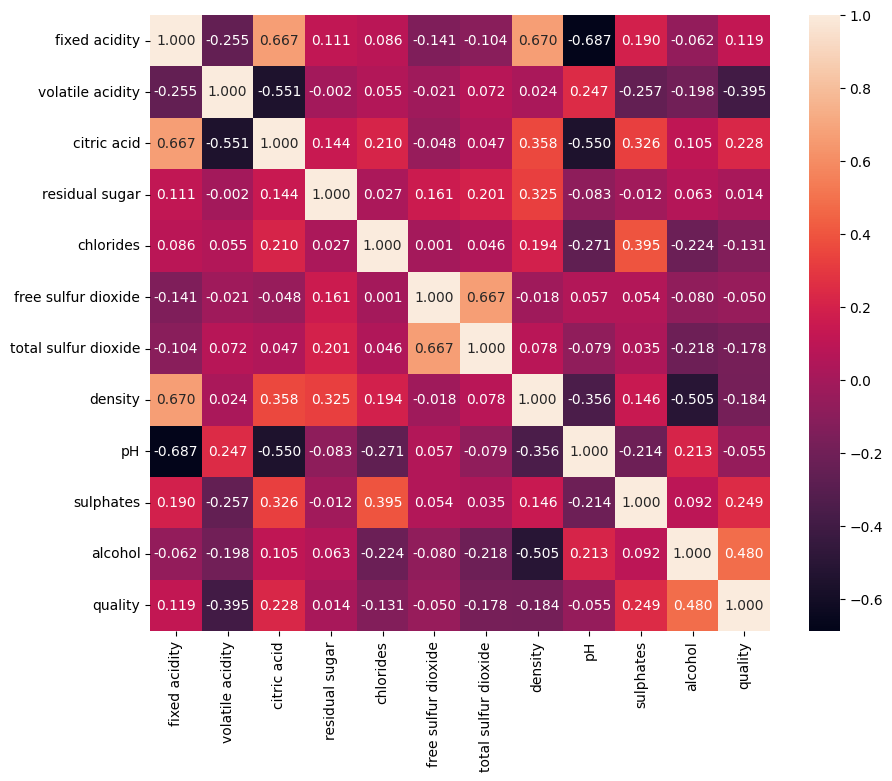

In [41]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(correlation_matrix, annot = True, fmt=".3f")

Looking at both heatmaps

For White Wine:
Alcohol is moderately correlated with a correlation factor of 0.463

However, for Red Wine:

We have two features with a weak correlation to quality which are
sulphates with 0.249
and citric acid with 0.228

And alcohol remains to be moderately correlated with a factor of 0.480

### **`Pair Plot`**

Pair plots are used to determine if there is a correlation between variables. By that standard, the following **x** values will be tested with respect to **y**

variables = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity


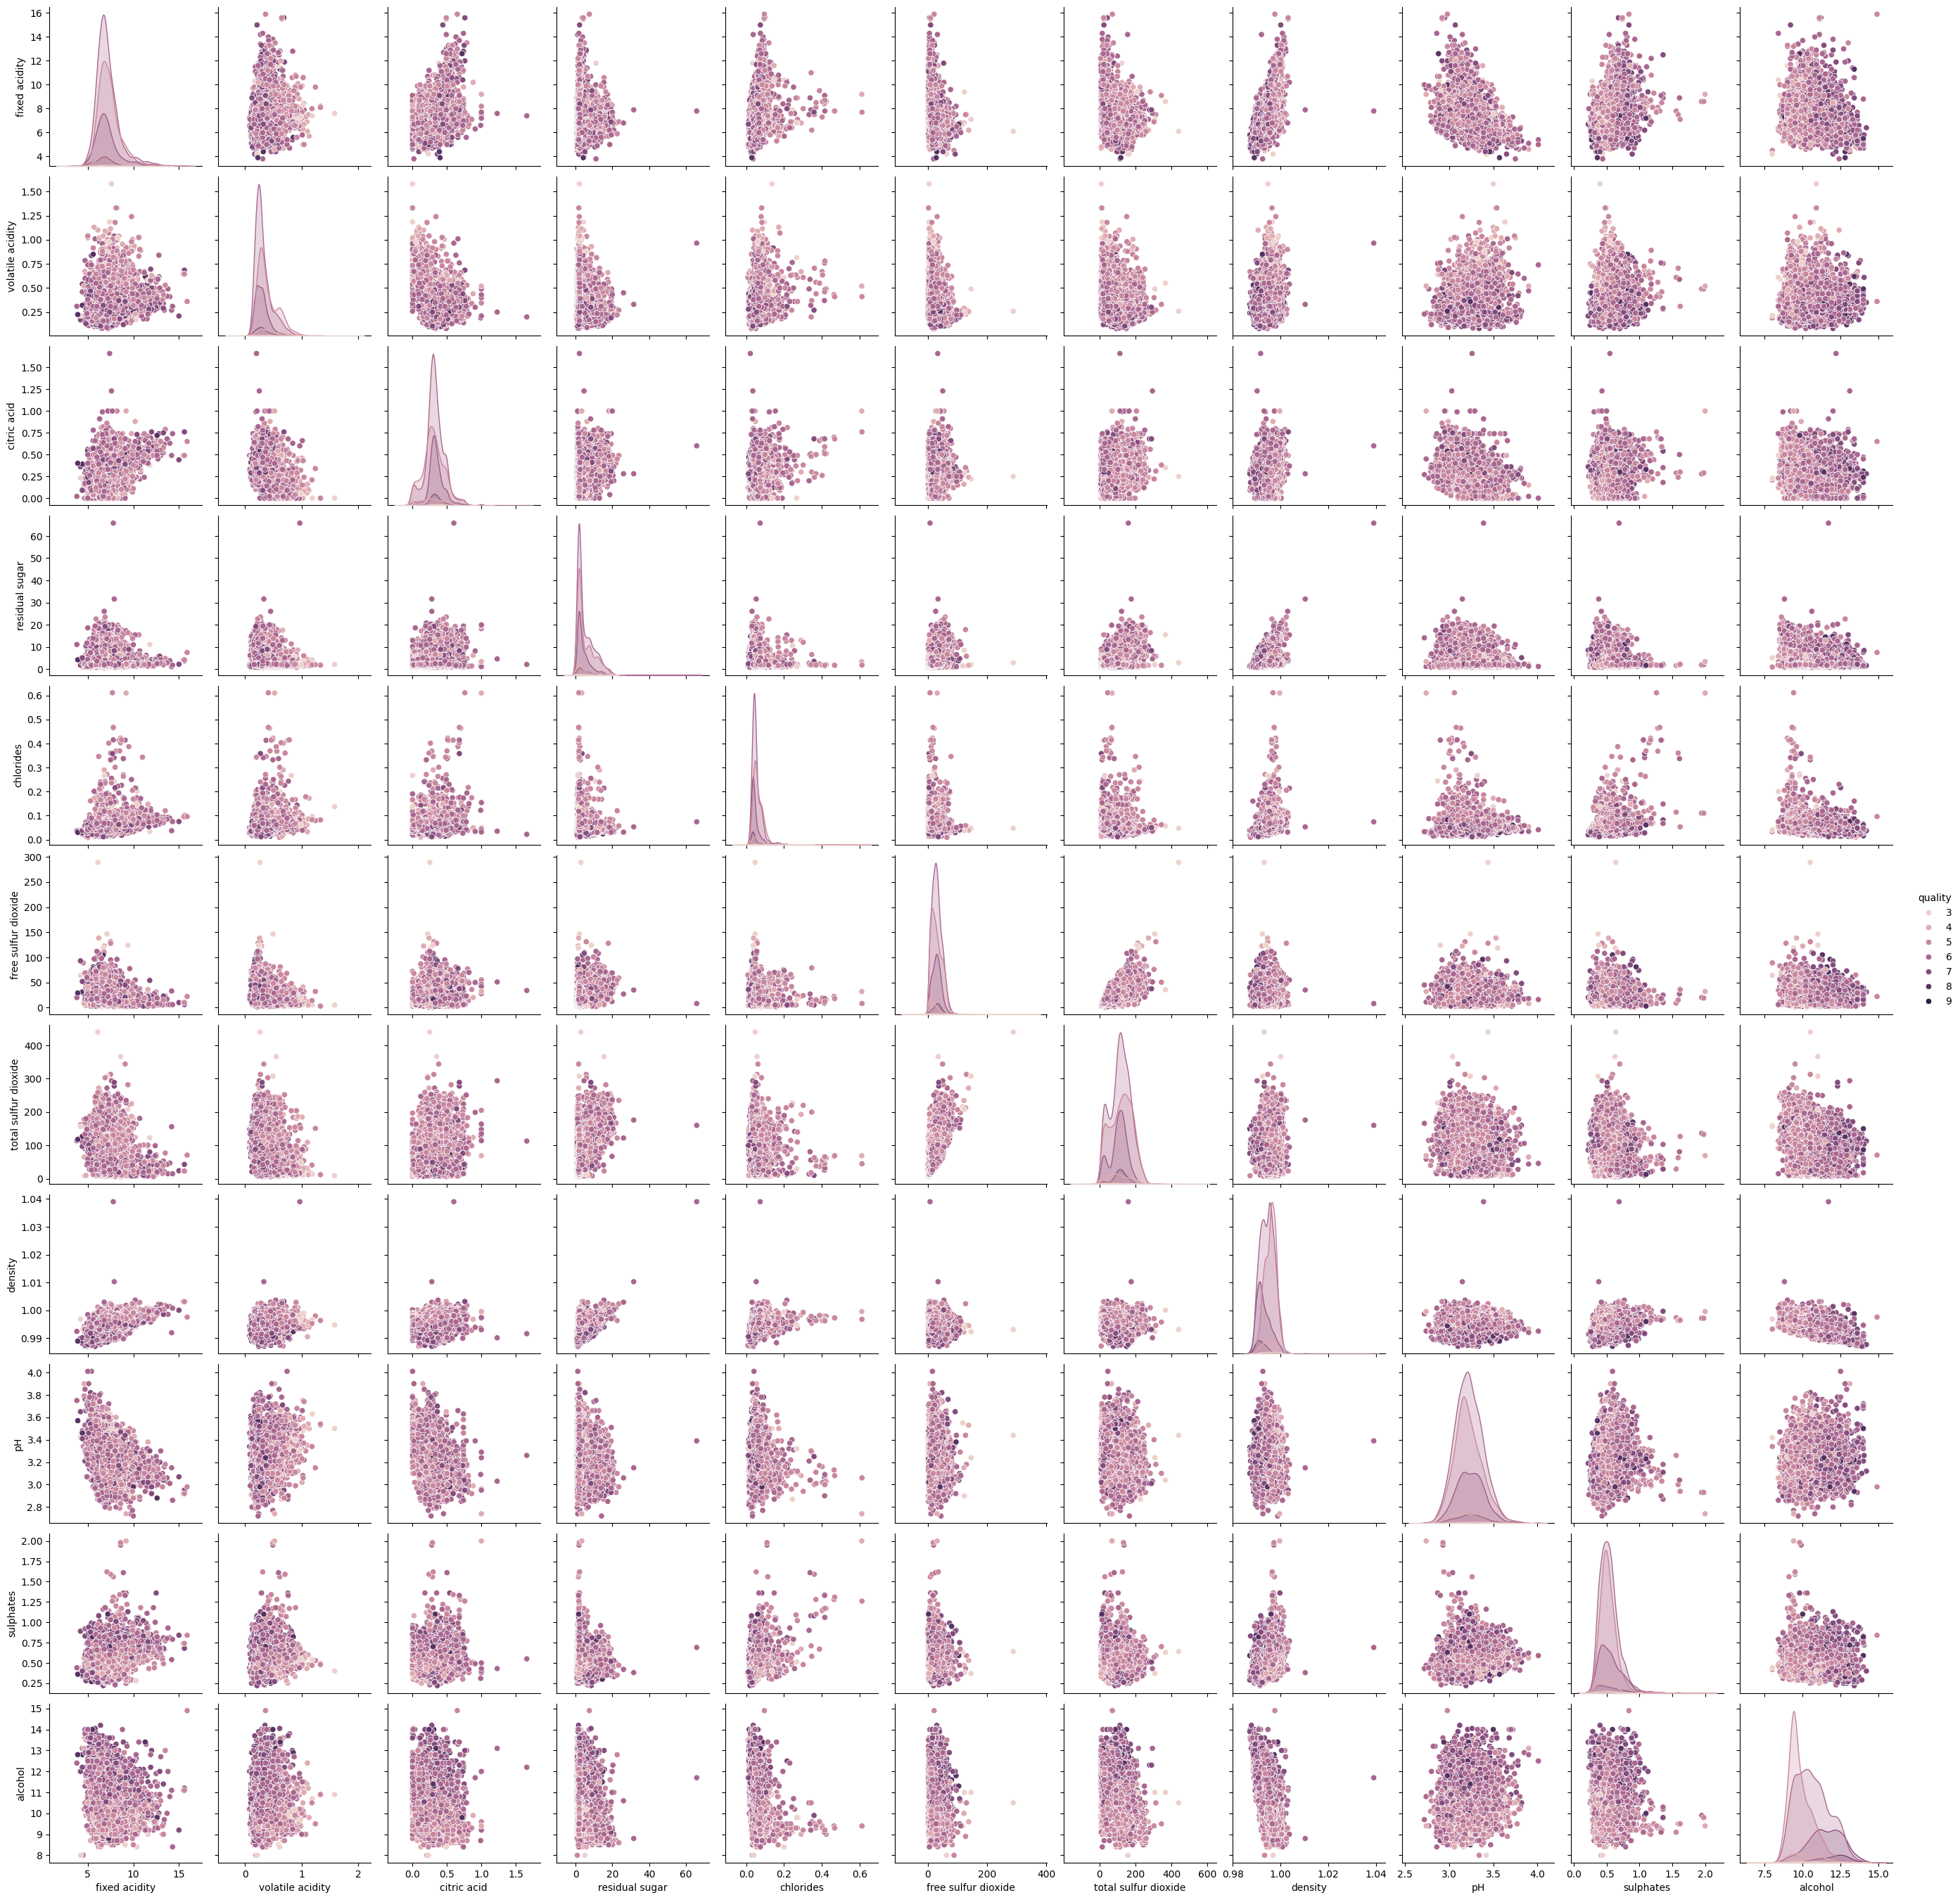

In [42]:
sns.pairplot(df, hue = 'quality')

looking at the scatter plots, it is evident that there is no real correlation between any of the variables with the quality of wine

## 3.) Does there exist any skewnewss among the distribution of each variable except the 'quality'?

### **`Histogram`**

Histograms are used to determine whether or not data is normally distributed, as such the following columns will be tested:

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity

## Red DF

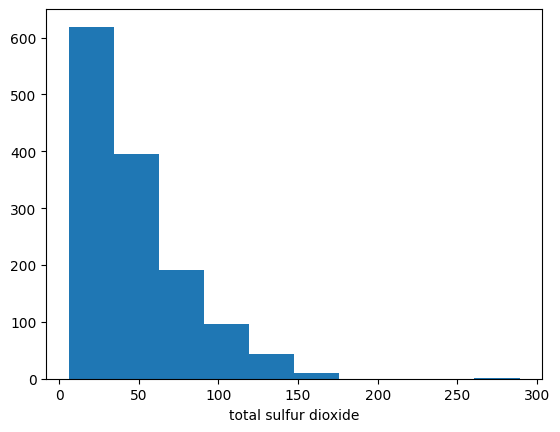

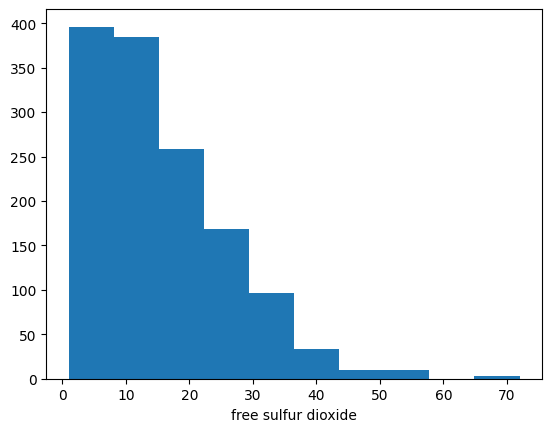

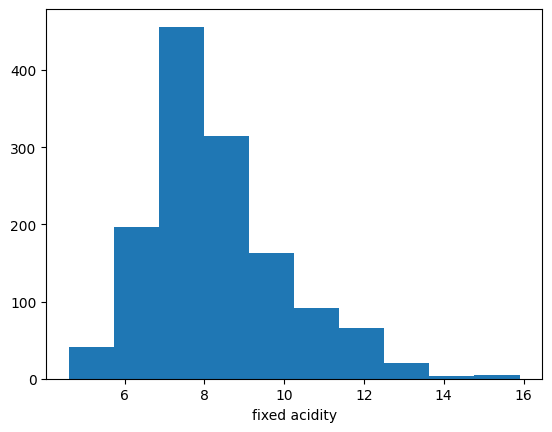

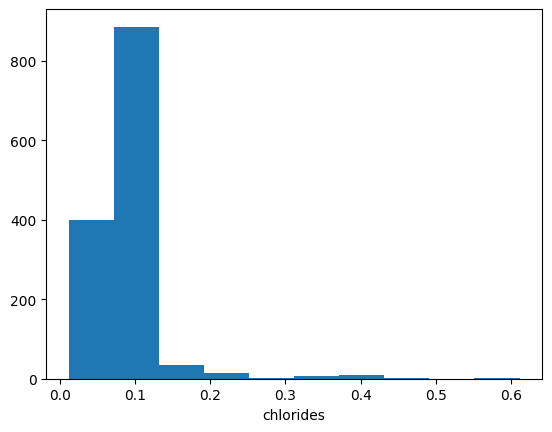

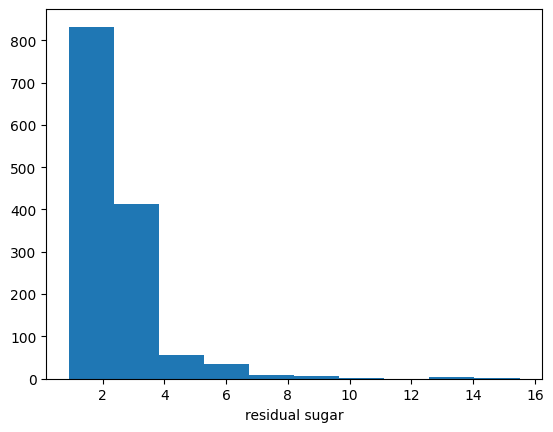

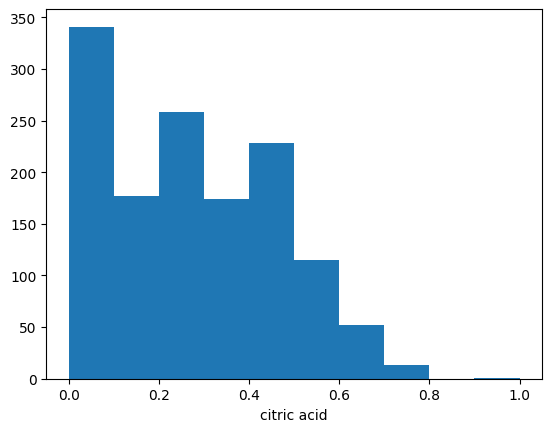

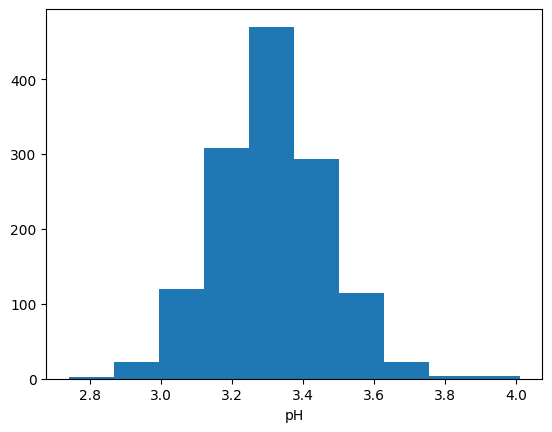

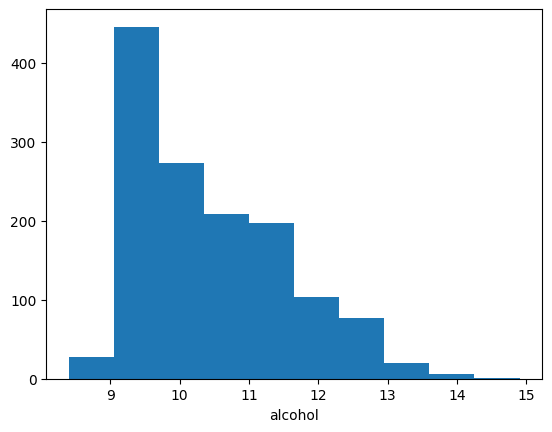

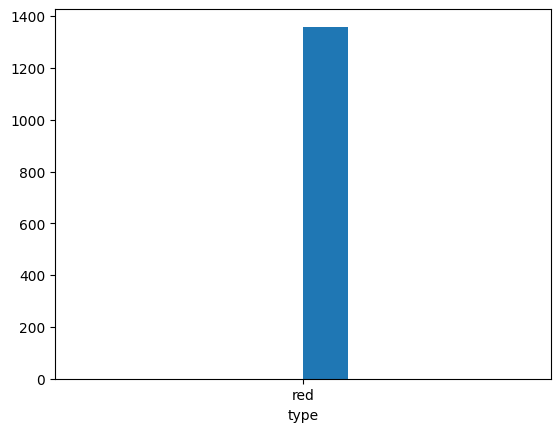

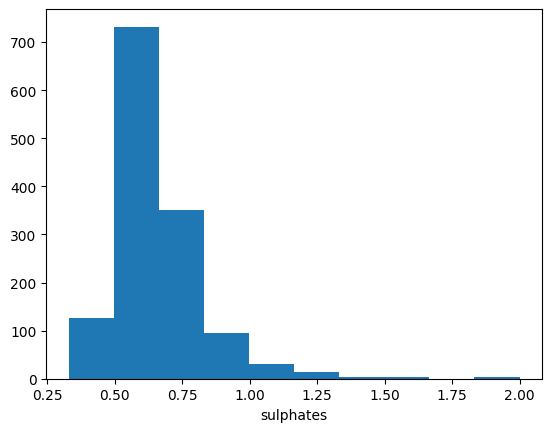

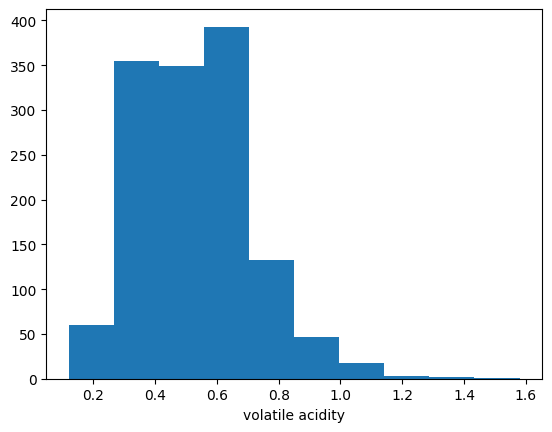

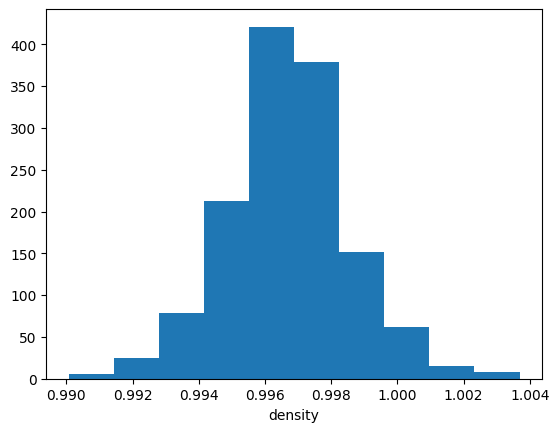

In [43]:
# All Features

for col in columns:
    x= df_red[col]
    plt.hist(x)
    plt.xlabel(col)
    plt.show()

Looking at the histograms for red wine:

Apart from the features such as 'pH' and 'density', the others seem to have some form of positive skewness in their distribution



## Selected White DF

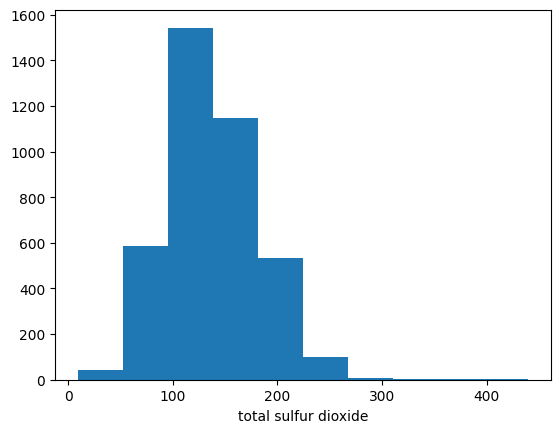

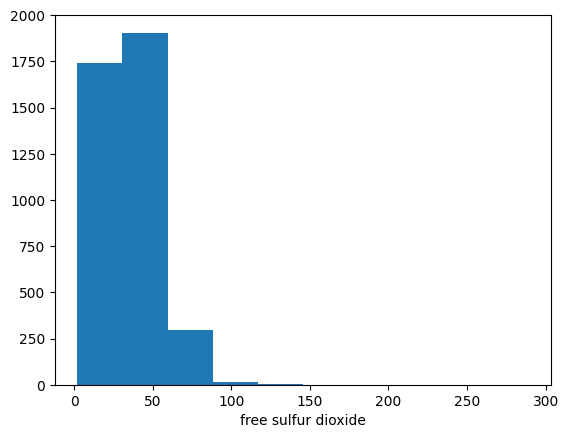

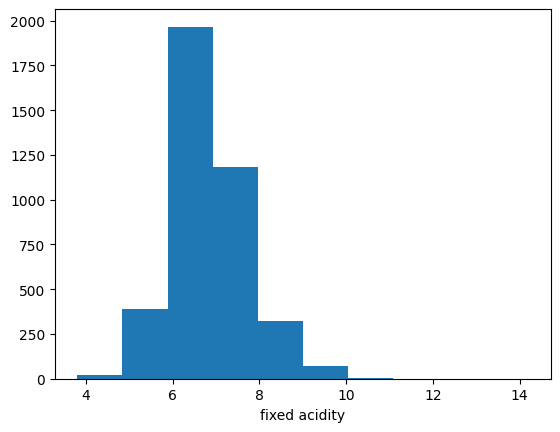

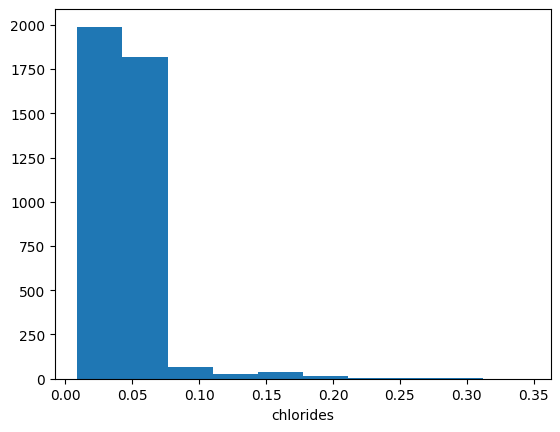

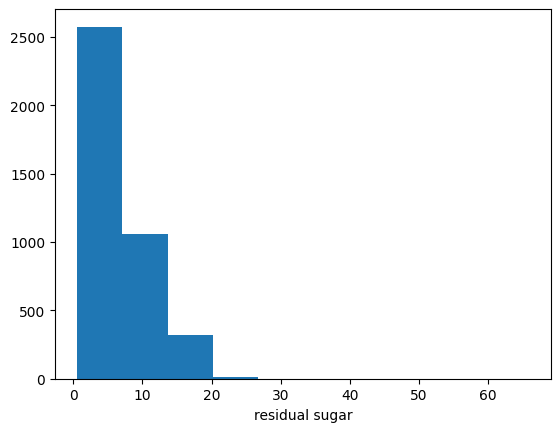

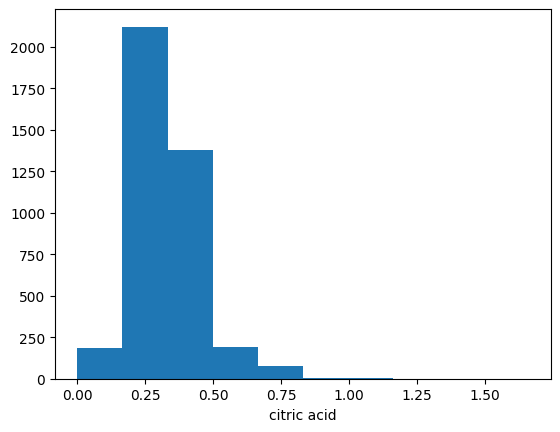

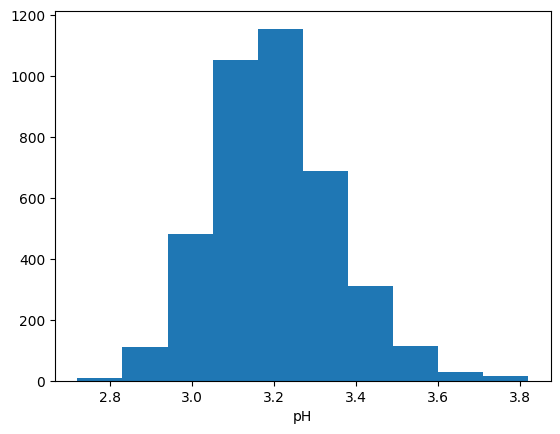

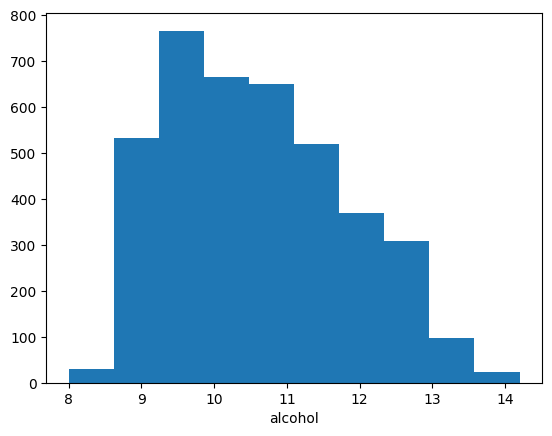

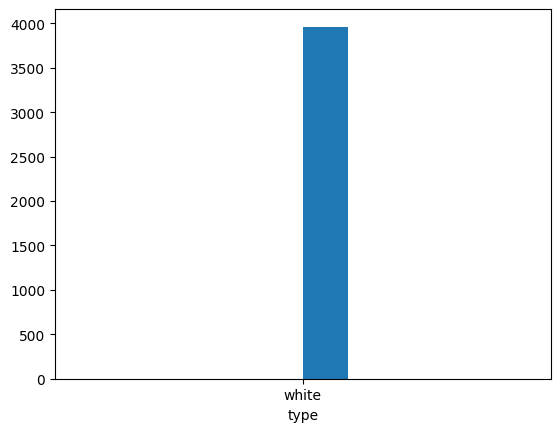

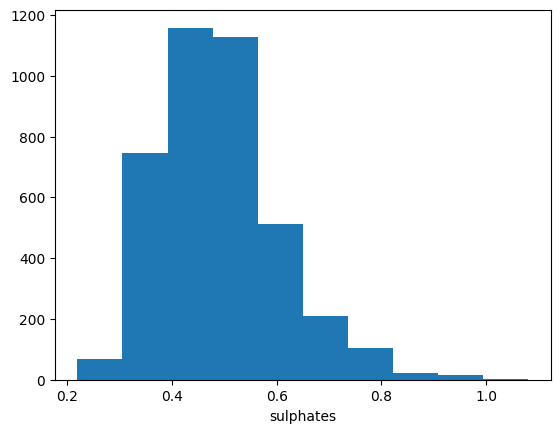

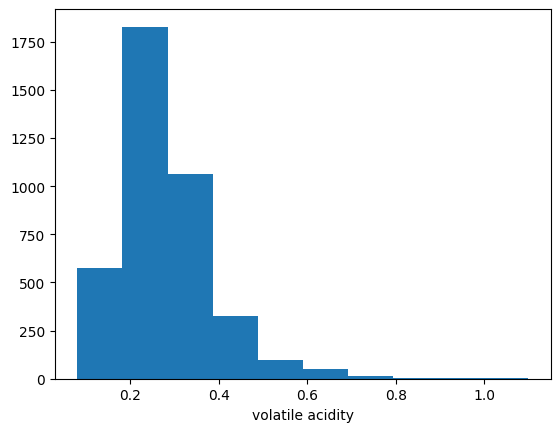

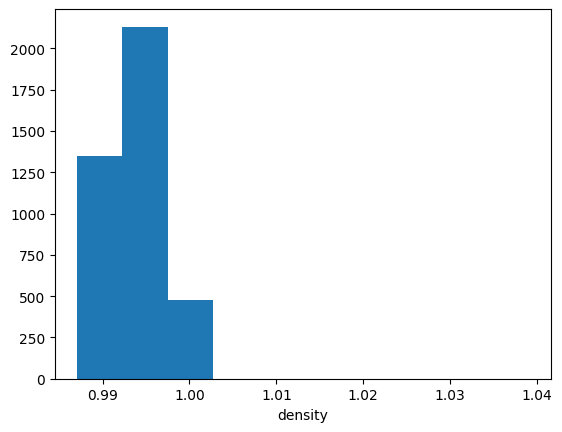

In [44]:

for col in columns:
    x= df_white[col]
    plt.hist(x)
    plt.xlabel(col)
    plt.show()

Looking at the histograms for white wine:

Apart from the "pH" feature, the others are positively skewed.

The columns selected are presenting only the 9 features of the original data set.

Citric acid has the most counts of zeroes. Racking up 118 of the data points. Dropping these rows will help gauge if normalizing the table would help find correlation better.

Citric acid histogram displays apparent skewness of distribution. Applying square root normalization instead to the data of citric acid.

Upon inspection of the visualized graph. Only minor changes can be noted in the color changes. The following observations are as follows

- It remains that <b>**`alcohol`**</b> has the most notable stength in correlation to quality.
- <b>**`fixed acidity`**</b> has a moderate positive correlation to <b>**`density`**</b> and <b>**`citric acid`**</b> moderately negative correlation to <b>**`pH`**</b>
- <b>**`volatile acidity`**</b> has low correlatability among other features, including quality, and moderately negative correlation to <b>**`citric acid`**</b>

## 4.) Are there outliers on the dataset?

### **`Box Plot`**

Box plots are used to determine outliers within columns

x = Alcohol, Chlorides, Citric Acid, Density, Fixed Acidity, Free Sulfur Dioxide, pH, Residual Sugar, Sulphates, Total Sulfur Dioxide, Volatile Acidity

In [45]:
df_red.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1359.000000       1359.000000  1359.000000     1359.000000   
mean        8.310596          0.529478     0.272333        2.523400   
std         1.736990          0.183031     0.195537        1.352314   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.430000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1359.000000          1359.000000           1359.000000  1359.000000   
mean      0.088124            15.893304             46.825975     0.996709   
std       0.049377            10.447270             33.408946     0.001869   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996700   
75%       0.091000            21.000000             63.000000     0.997820   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1359.000000  1359.000000  1359.000000  1359.000000  
mean      3.309787     0.658705    10.432315     5.623252  
std       0.155036     0.170667     1.082065     0.823578  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [46]:
df_white.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    3961.000000       3961.000000  3961.000000     3961.000000   
mean        6.839346          0.280538     0.334332        5.914819   
std         0.866860          0.103437     0.122446        4.861646   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.600000   
50%         6.800000          0.260000     0.320000        4.700000   
75%         7.300000          0.330000     0.390000        8.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  3961.000000          3961.000000           3961.000000  3961.000000   
mean      0.045905            34.889169            137.193512     0.993790   
std       0.023103            17.210021             43.129065     0.002905   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.035000            23.000000            106.000000     0.991620   
50%       0.042000            33.000000            133.000000     0.993500   
75%       0.050000            45.000000            166.000000     0.995710   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  3961.000000  3961.000000  3961.000000  3961.000000  
mean      3.195458     0.490351    10.589358     5.854835  
std       0.151546     0.113523     1.217076     0.890683  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.480000    10.400000     6.000000  
75%       3.290000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

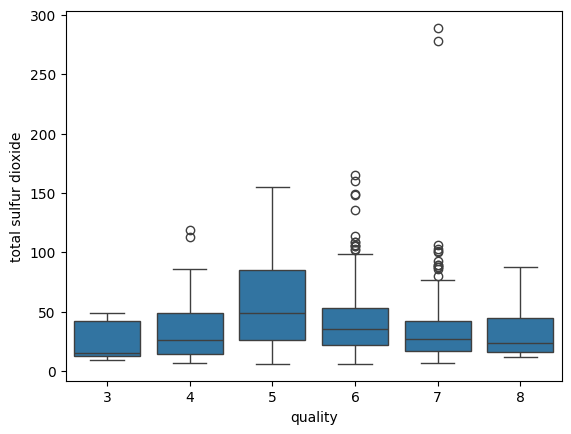

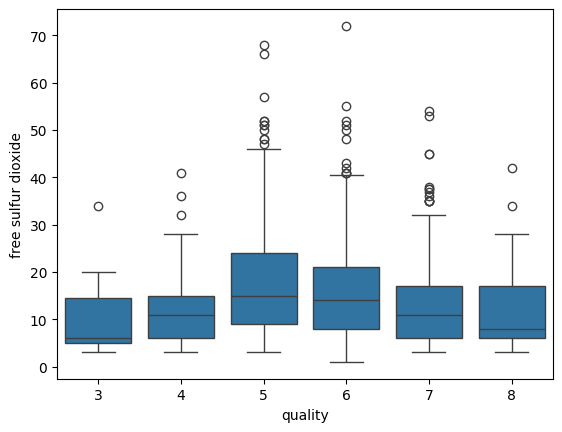

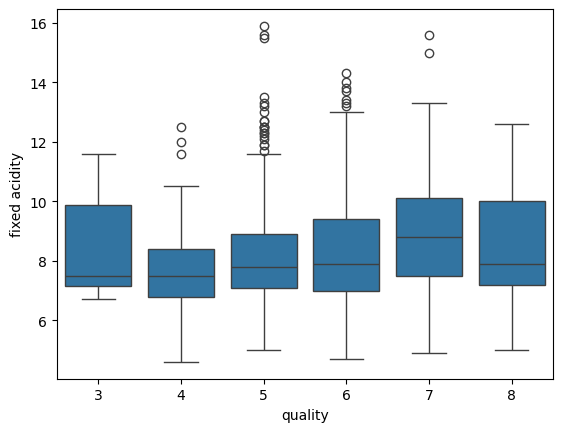

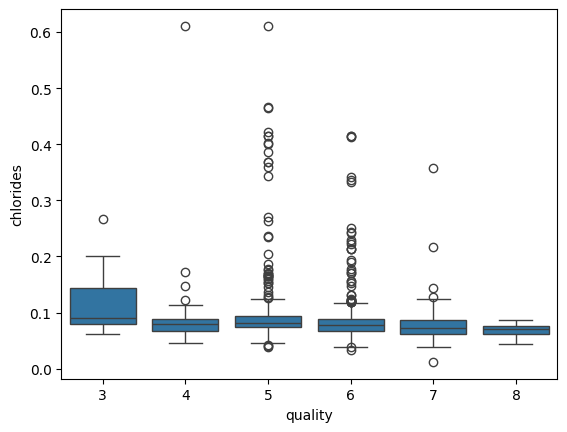

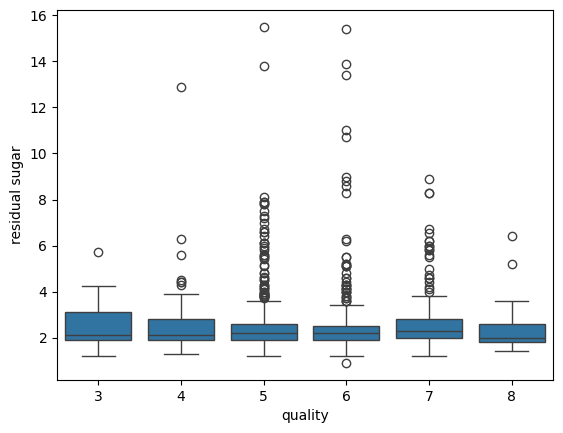

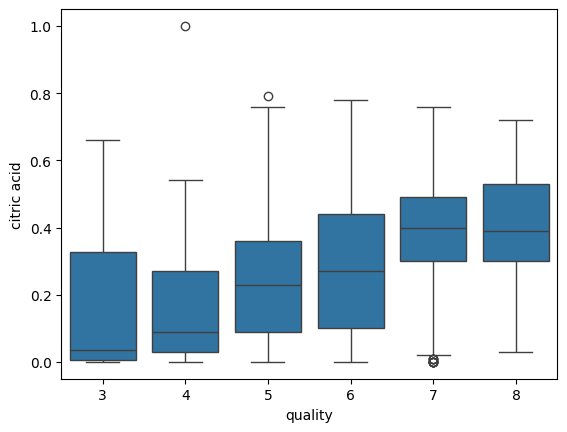

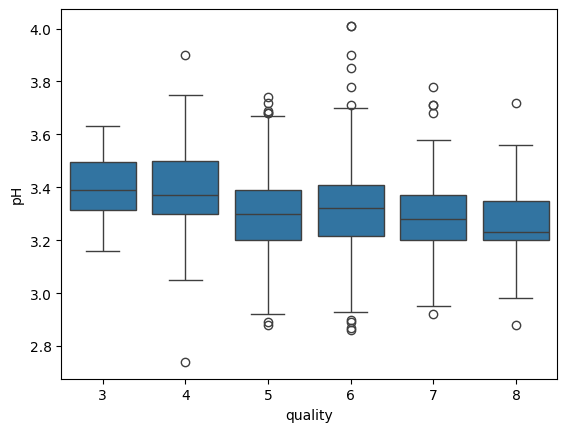

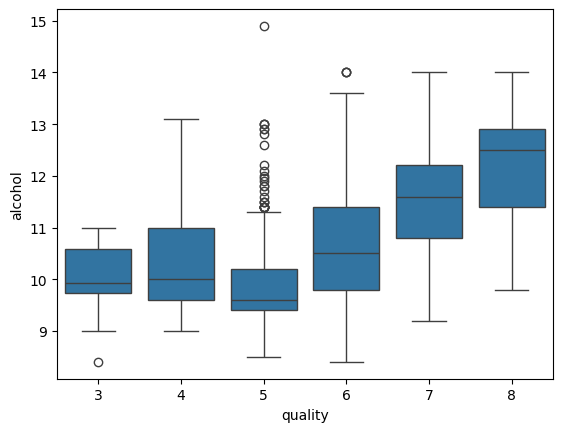

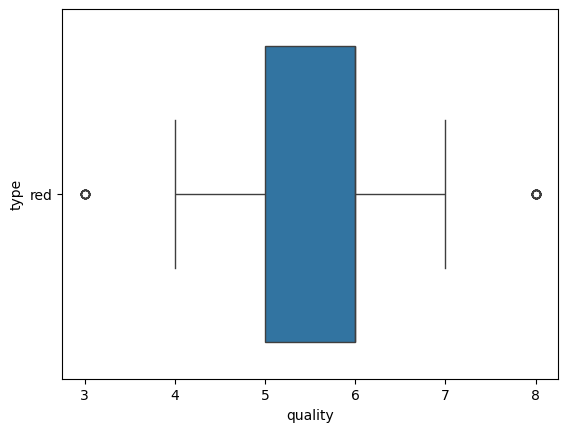

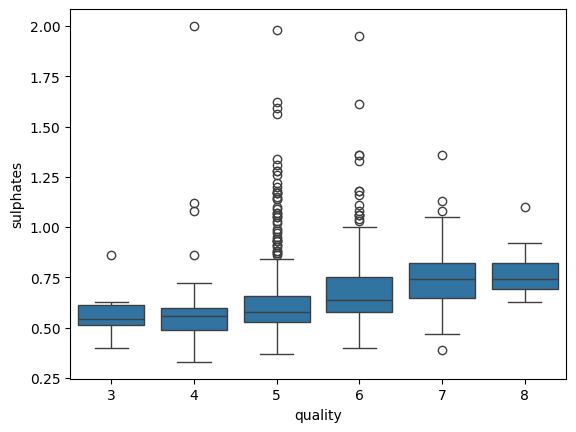

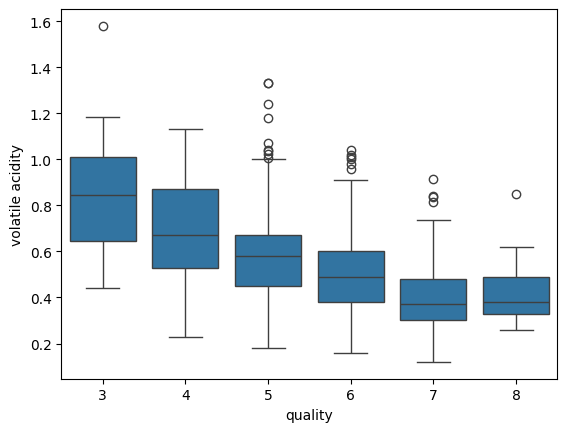

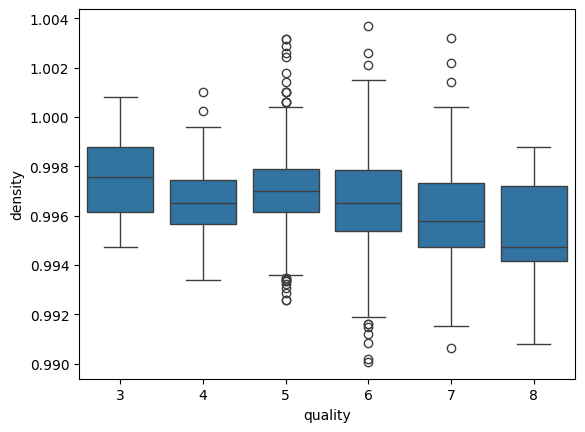

In [47]:
for col in columns:
    sns.boxplot(df_red, x = 'quality', y = col)
    plt.show()

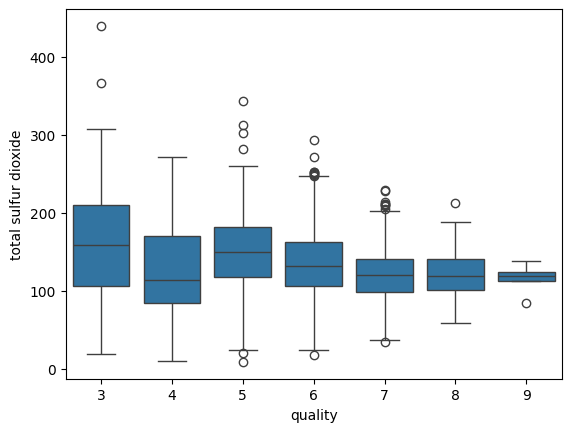

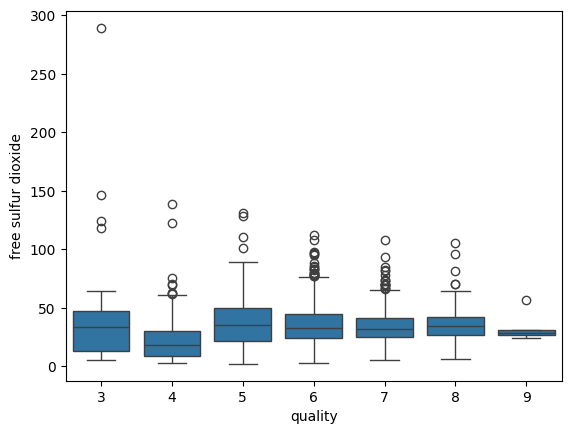

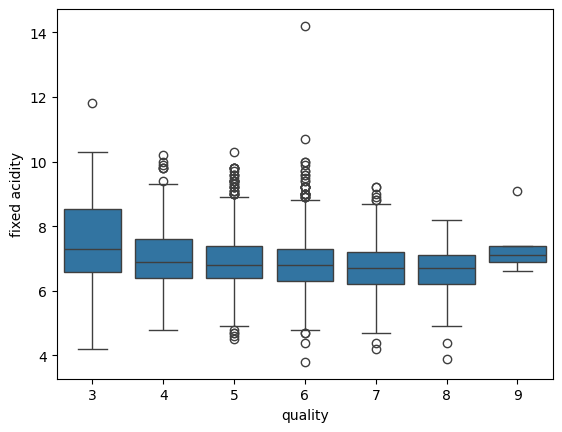

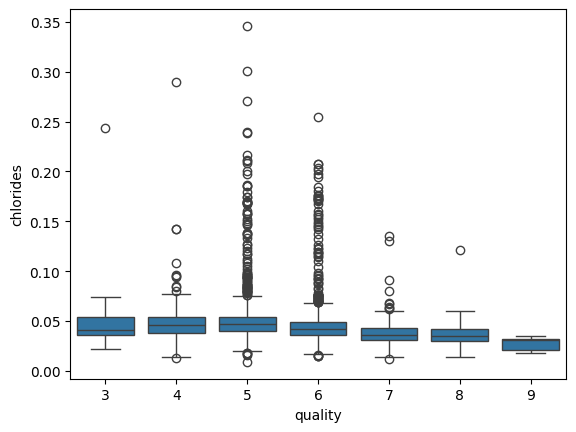

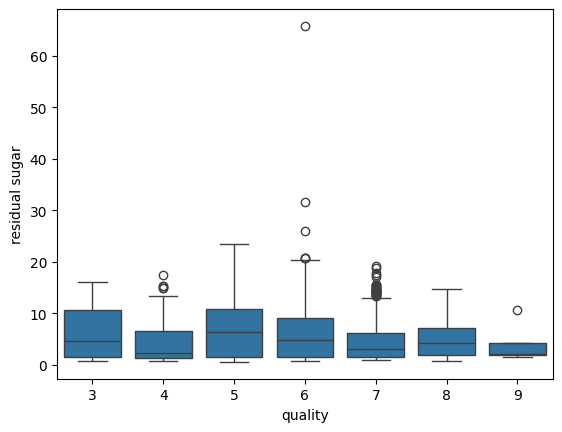

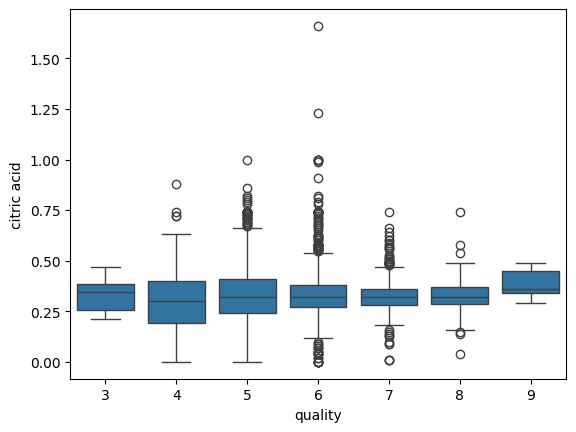

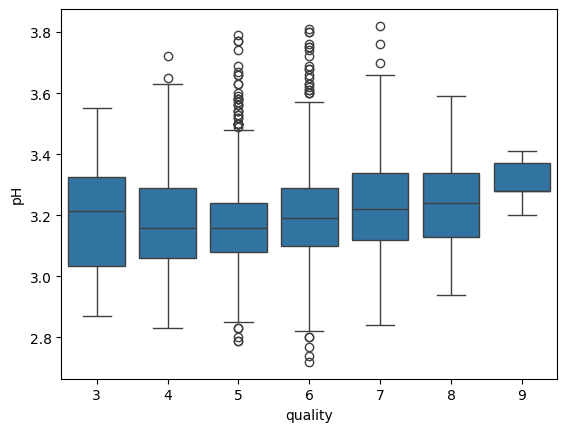

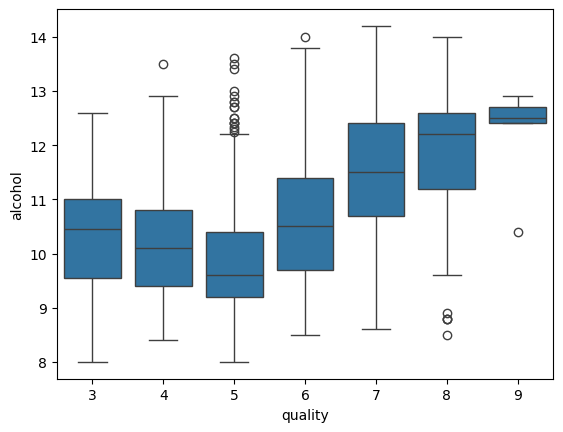

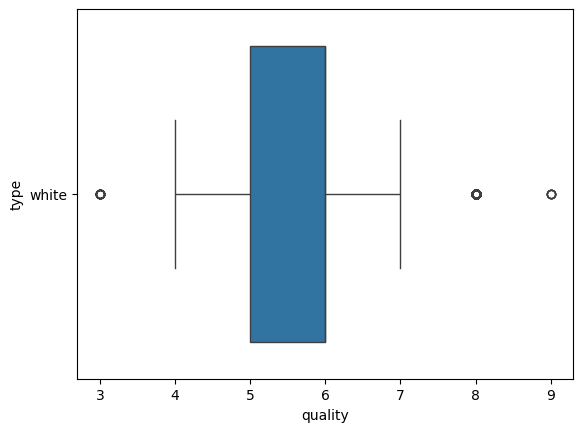

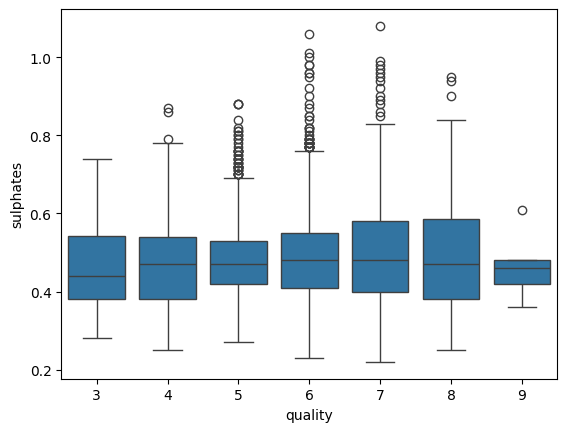

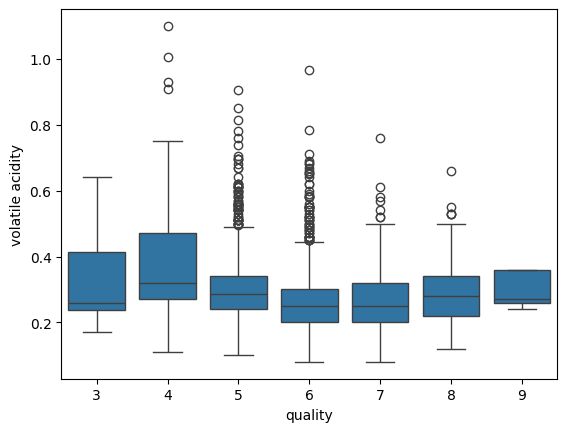

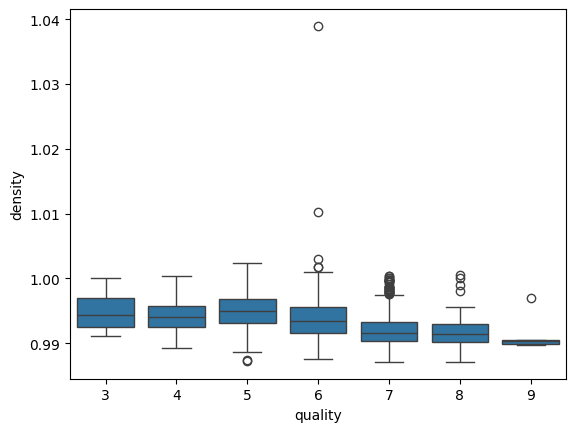

In [48]:
for col in columns:
    sns.boxplot(df_white, x = 'quality', y = col)
    plt.show()

### **`Removing Outliers`**

In [49]:
def getQuartiles(data):
    upper_quartile = data.quantile(0.75)
    lower_quartile = data.quantile(0)
    return pd.Series([lower_quartile, upper_quartile], index=['Lower Quartile', 'Upper Quartile'])

In [50]:
def remove_outliers(group):
    q1 = group.quantile(0.25)
    q3 = group.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return group[(group >= lower_bound) & (group <= upper_bound)]

In [51]:
quartiles_red = []
quartiles_white = []

def remove_outliers_recursive(df, columns):
  """
  This function recursively removes rows with outliers in any column.
  """
  if len(columns) ==0:
    return df  # Base case: no more columns to assess

  # Get current column name
  current_col = columns[0]

  # Clean the current column by quality group
  if current_col != "type":

      cleaned_series = df.groupby('quality')[current_col].apply(remove_outliers)

      # Filter DataFrame to keep rows without outliers in the current column
      df_filtered = df[df[current_col].isin(cleaned_series)]

  # Recursive call with filtered DataFrame and remaining columns
      return remove_outliers_recursive(df_filtered, columns[1:])
  else:
      return remove_outliers_recursive(df, columns[1:])

for col in columns_notype:
    if col == "type":
        continue

    quartiles_red.append(df_red.groupby(['quality'])[col].apply(getQuartiles))
    quartiles_white.append(df_white.groupby(['quality'])[col].apply(getQuartiles))
    # quartiles_transformed_red.append(df_red.groupby('quality')[col].apply(getQuartiles))




df_final_cleaned_red = remove_outliers_recursive(df_red.copy()[columns_notype], columns_notype)
df_final_cleaned_white = remove_outliers_recursive(df_white.copy()[columns_notype], columns_notype)



In [52]:
df_red.info()
df_final_cleaned_red.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1359 entries, 4898 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  1359 non-null   object 
 1   fixed acidity         1359 non-null   float64
 2   volatile acidity      1359 non-null   float64
 3   citric acid           1359 non-null   float64
 4   residual sugar        1359 non-null   float64
 5   chlorides             1359 non-null   float64
 6   free sulfur dioxide   1359 non-null   float64
 7   total sulfur dioxide  1359 non-null   float64
 8   density               1359 non-null   float64
 9   pH                    1359 non-null   float64
 10  sulphates             1359 non-null   float64
 11  alcohol               1359 non-null   float64
 12  quality               1359 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 148.6+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 1071 entries, 4898 t

In [53]:
df_white.info()
df_final_cleaned_white.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3961 entries, 0 to 4897
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  3961 non-null   object 
 1   fixed acidity         3961 non-null   float64
 2   volatile acidity      3961 non-null   float64
 3   citric acid           3961 non-null   float64
 4   residual sugar        3961 non-null   float64
 5   chlorides             3961 non-null   float64
 6   free sulfur dioxide   3961 non-null   float64
 7   total sulfur dioxide  3961 non-null   float64
 8   density               3961 non-null   float64
 9   pH                    3961 non-null   float64
 10  sulphates             3961 non-null   float64
 11  alcohol               3961 non-null   float64
 12  quality               3961 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 433.2+ KB
<class 'pandas.core.frame.DataFrame'>
Index: 3530 entries, 1 to 4897

## 5.) Does removing the outlier change noticeably the correlations of the variables of the red and white wine datasets?

In [54]:
corr_white = df_final_cleaned_white[columns_notype].corr()
formatted_matrix = corr_white.applymap(lambda x: f"{x:.3f}")
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.050       0.306   
volatile acidity            -0.050            1.000      -0.194   
citric acid                  0.306           -0.194       1.000   
residual sugar               0.059            0.078       0.097   
chlorides                    0.086            0.008       0.034   
free sulfur dioxide         -0.042           -0.090       0.102   
total sulfur dioxide         0.071            0.094       0.123   
density                      0.248            0.012       0.139   
pH                          -0.398           -0.043      -0.146   
sulphates                   -0.023           -0.028       0.066   
alcohol                     -0.097            0.069      -0.037   
quality                     -0.110           -0.140       0.036   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                 0.059     0.086              -0.042   
volatile acidity              0.078     0.008              -0.090   
citric acid                   0.097     0.034               0.102   
residual sugar                1.000     0.242               0.363   
chlorides                     0.242     1.000               0.163   
free sulfur dioxide           0.363     0.163               1.000   
total sulfur dioxide          0.429     0.361               0.626   
density                       0.814     0.489               0.344   
pH                           -0.163     0.000              -0.024   
sulphates                    -0.015     0.076               0.035   
alcohol                      -0.424    -0.541              -0.263   
quality                      -0.129    -0.309               0.016   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                       0.071   0.248  -0.398    -0.023  -0.097   
volatile acidity                    0.094   0.012  -0.043    -0.028   0.069   
citric acid                         0.123   0.139  -0.146     0.066  -0.037   
residual sugar                      0.429   0.814  -0.163    -0.015  -0.424   
chlorides                           0.361   0.489   0.000     0.076  -0.541   
free sulfur dioxide                 0.626   0.344  -0.024     0.035  -0.263   
total sulfur dioxide                1.000   0.558   0.003     0.138  -0.458   
density                             0.558   1.000  -0.043     0.099  -0.800   
pH                                  0.003  -0.043   1.000     0.133   0.058   
sulphates                           0.138   0.099   0.133     1.000  -0.061   
alcohol                            -0.458  -0.800   0.058    -0.061   1.000   
quality                            -0.172  -0.352   0.123     0.049   0.472   

                     quality  
fixed acidity         -0.110  
volatile acidity      -0.140  
citric acid            0.036  
residual sugar        -0.129  
chlorides             -0.309  
free sulfur dioxide    0.016  
total sulfur dioxide  -0.172  
density               -0.352  
pH                     0.123  
sulphates              0.049  
alcohol                0.472  
quality                1.000

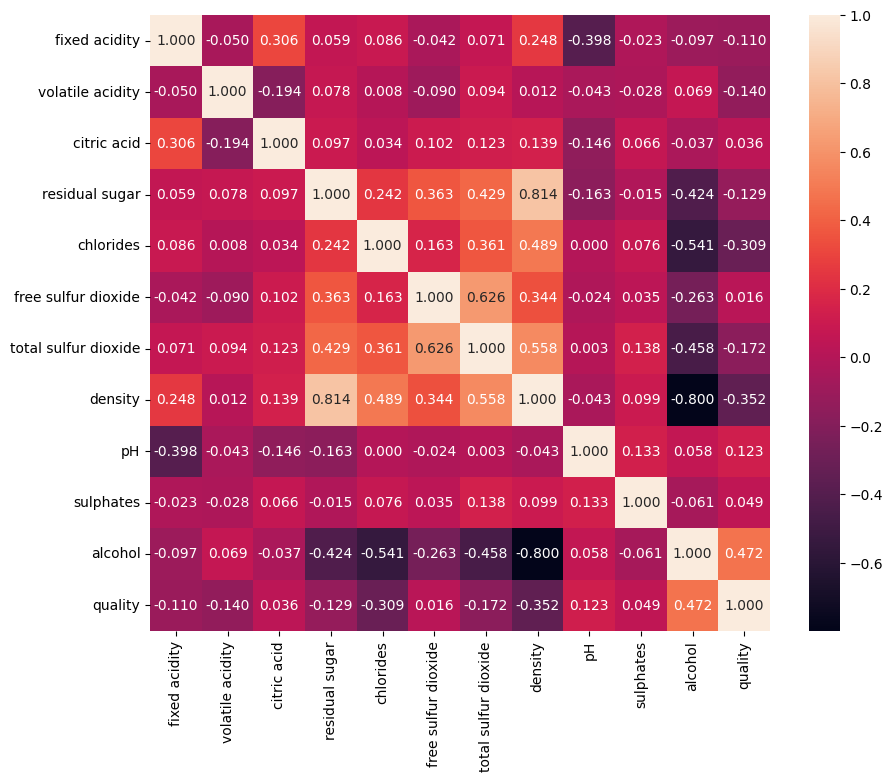

In [55]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(corr_white, annot = True, fmt=".3f")

In [56]:
corr_red = df_final_cleaned_red[columns_notype].corr()
formatted_matrix = corr_red.applymap(lambda x: f"{x:.3f}")
formatted_matrix

fixed acidity volatile acidity citric acid  \
fixed acidity                1.000           -0.263       0.682   
volatile acidity            -0.263            1.000      -0.599   
citric acid                  0.682           -0.599       1.000   
residual sugar               0.218            0.061       0.142   
chlorides                    0.187            0.143       0.086   
free sulfur dioxide         -0.132            0.000      -0.057   
total sulfur dioxide        -0.074            0.122       0.019   
density                      0.639            0.056       0.328   
pH                          -0.707            0.237      -0.522   
sulphates                    0.182           -0.348       0.283   
alcohol                     -0.061           -0.226       0.119   
quality                      0.094           -0.395       0.215   

                     residual sugar chlorides free sulfur dioxide  \
fixed acidity                 0.218     0.187              -0.132   
volatile acidity              0.061     0.143               0.000   
citric acid                   0.142     0.086              -0.057   
residual sugar                1.000     0.247               0.072   
chlorides                     0.247     1.000               0.039   
free sulfur dioxide           0.072     0.039               1.000   
total sulfur dioxide          0.169     0.181               0.632   
density                       0.385     0.424              -0.029   
pH                           -0.071    -0.174               0.084   
sulphates                     0.013    -0.116               0.056   
alcohol                       0.060    -0.340              -0.049   
quality                      -0.039    -0.258              -0.030   

                     total sulfur dioxide density      pH sulphates alcohol  \
fixed acidity                      -0.074   0.639  -0.707     0.182  -0.061   
volatile acidity                    0.122   0.056   0.237    -0.348  -0.226   
citric acid                         0.019   0.328  -0.522     0.283   0.119   
residual sugar                      0.169   0.385  -0.071     0.013   0.060   
chlorides                           0.181   0.424  -0.174    -0.116  -0.340   
free sulfur dioxide                 0.632  -0.029   0.084     0.056  -0.049   
total sulfur dioxide                1.000   0.132  -0.035    -0.093  -0.254   
density                             0.132   1.000  -0.295     0.036  -0.555   
pH                                 -0.035  -0.295   1.000    -0.004   0.157   
sulphates                          -0.093   0.036  -0.004     1.000   0.326   
alcohol                            -0.254  -0.555   0.157     0.326   1.000   
quality                            -0.203  -0.265  -0.068     0.451   0.526   

                     quality  
fixed acidity          0.094  
volatile acidity      -0.395  
citric acid            0.215  
residual sugar        -0.039  
chlorides             -0.258  
free sulfur dioxide   -0.030  
total sulfur dioxide  -0.203  
density               -0.265  
pH                    -0.068  
sulphates              0.451  
alcohol                0.526  
quality                1.000

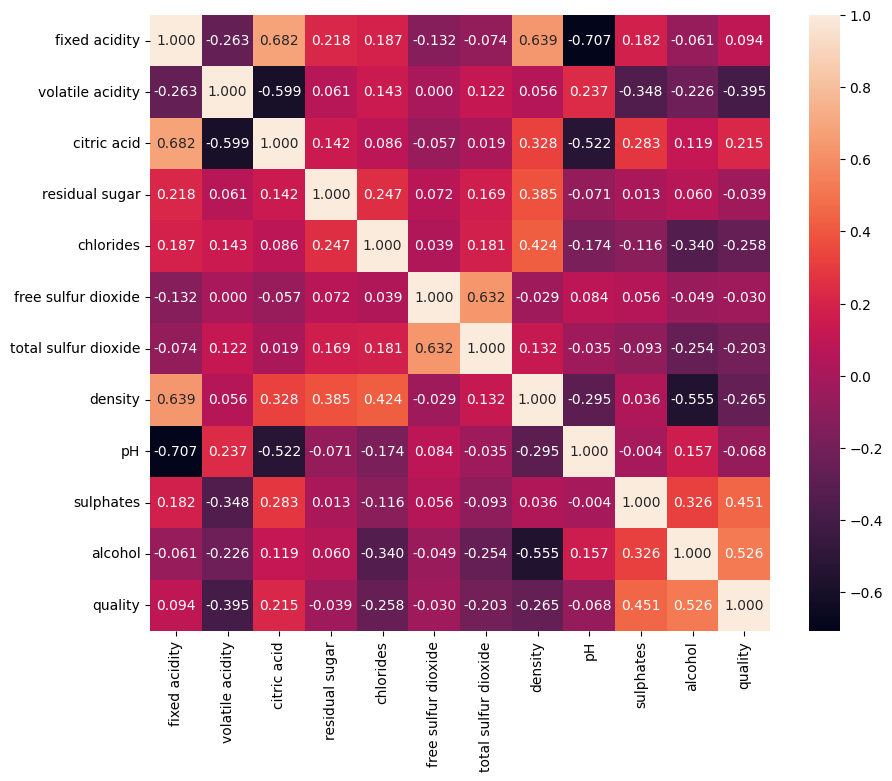

In [57]:
plt.figure(figsize =(10,8))
plot = sns.heatmap(corr_red, annot = True, fmt=".3f")

Observing the new heatmaps, it can be seen that there was a change in the correlation coefficient.

For White Wine:
Although alcohol is still the only feature that is moderately correlated, its factor changed from 0.463 to 0.472

As for Red Wine:

citric acid remains to be weakly correlated to quality with a factor of 0.215

However, we can observe a significant effect with sulphates having a weak correlation of 0.249 to now having a moderate correlation to the quality of the red wine with its new coefficient of 0.451


the alcohol feature also increased from a 0.480 to a 0.526 correlation factor

## 6.) Which features between the red and white wine correlation coefficients have the most difference?

In [58]:
corr_diff = corr_white - corr_red
corr_diff

fixed acidity  volatile acidity  citric acid  \
fixed acidity              0.000000          0.213774    -0.375564   
volatile acidity           0.213774          0.000000     0.404843   
citric acid               -0.375564          0.404843     0.000000   
residual sugar            -0.159375          0.016835    -0.044682   
chlorides                 -0.100220         -0.135279    -0.051487   
free sulfur dioxide        0.090097         -0.090157     0.158715   
total sulfur dioxide       0.145564         -0.027931     0.104005   
density                   -0.390763         -0.043825    -0.188948   
pH                         0.309196         -0.280014     0.375161   
sulphates                 -0.204328          0.320392    -0.217028   
alcohol                   -0.036002          0.294949    -0.155444   
quality                   -0.203640          0.255100    -0.179468   

                      residual sugar  chlorides  free sulfur dioxide  \
fixed acidity              -0.159375  -0.100220             0.090097   
volatile acidity            0.016835  -0.135279            -0.090157   
citric acid                -0.044682  -0.051487             0.158715   
residual sugar              0.000000  -0.005725             0.291035   
chlorides                  -0.005725   0.000000             0.124454   
free sulfur dioxide         0.291035   0.124454             0.000000   
total sulfur dioxide        0.260222   0.179673            -0.006126   
density                     0.429657   0.064365             0.373109   
pH                         -0.091550   0.174528            -0.107740   
sulphates                  -0.027726   0.192110            -0.020622   
alcohol                    -0.484376  -0.200794            -0.213982   
quality                    -0.089810  -0.051621             0.046603   

                      total sulfur dioxide   density        pH  sulphates  \
fixed acidity                     0.145564 -0.390763  0.309196  -0.204328   
volatile acidity                 -0.027931 -0.043825 -0.280014   0.320392   
citric acid                       0.104005 -0.188948  0.375161  -0.217028   
residual sugar                    0.260222  0.429657 -0.091550  -0.027726   
chlorides                         0.179673  0.064365  0.174528   0.192110   
free sulfur dioxide              -0.006126  0.373109 -0.107740  -0.020622   
total sulfur dioxide              0.000000  0.426529  0.037997   0.230386   
density                           0.426529  0.000000  0.252014   0.063031   
pH                                0.037997  0.252014  0.000000   0.137049   
sulphates                         0.230386  0.063031  0.137049   0.000000   
alcohol                          -0.203887 -0.244350 -0.098977  -0.387241   
quality                           0.030575 -0.086808  0.191400  -0.401251   

                       alcohol   quality  
fixed acidity        -0.036002 -0.203640  
volatile acidity      0.294949  0.255100  
citric acid          -0.155444 -0.179468  
residual sugar       -0.484376 -0.089810  
chlorides            -0.200794 -0.051621  
free sulfur dioxide  -0.213982  0.046603  
total sulfur dioxide -0.203887  0.030575  
density              -0.244350 -0.086808  
pH                   -0.098977  0.191400  
sulphates            -0.387241 -0.401251  
alcohol               0.000000 -0.054433  
quality              -0.054433  0.000000

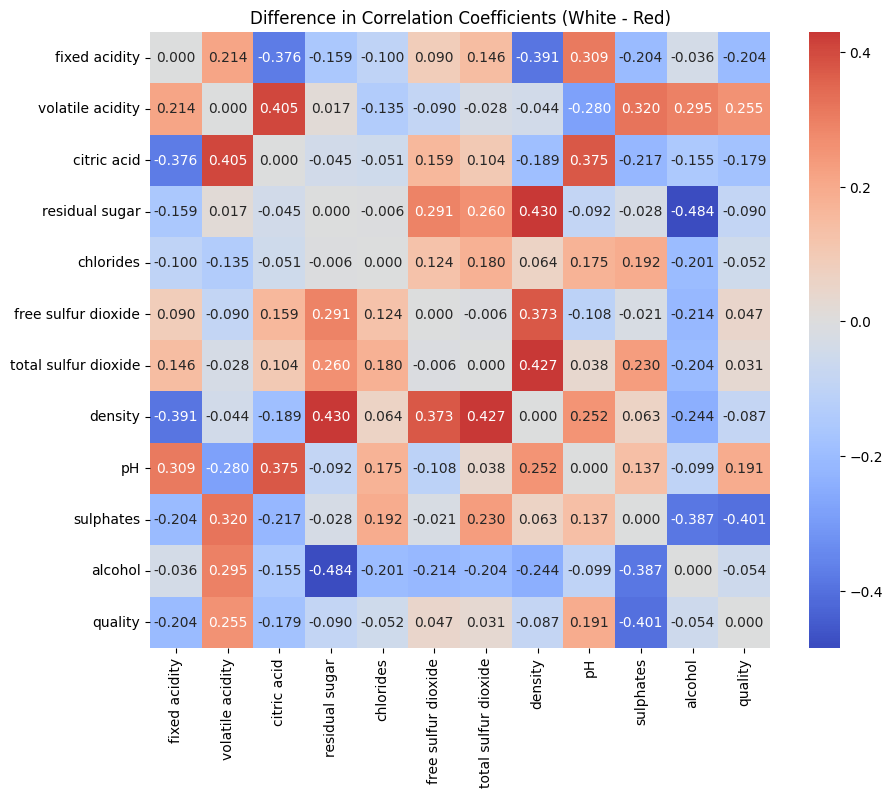

In [59]:

plt.figure(figsize=(10,8))
sns.heatmap(corr_diff, annot= True, fmt=".3f", cmap="coolwarm", center=0)
plt.title("Difference in Correlation Coefficients (White - Red)")
plt.show()

By looking at its absolute values, we can say that the features with the highest coefficient difference focusing on quality between the two dataset groups are


- sulphates
- fixed acidity
- volatile acidity
- citric acid
- pH

### **`Kruskal Wallace Test`**

In [64]:
data = df.groupby('quality')['alcohol'].apply(list)
test = [group for group in data]

stat, p_value = kruskal(*test)

print(f"Kruskal-Wallis H-test statistic: {stat}")
print(f"P-value: {p_value}")



Kruskal-Wallis H-test statistic: 1335.2152652724135
P-value: 2.576337207036563e-285


Since we can see that the P-value is less than 0.05, we can conclude that there is a statistically significant difference between the groups

# Research Question

<h1 style="color:blue"> Are the correlation coefficients between physiochemical properties of acidity and sulphates to the rated quality of red wine significantly more different than correlation coefficients of white wine? </h1>

The features of *density*, *fixed acidity*, *pH*, and *alcohol* have very high collinearity among the other features. We will simply drop them in a new selected dataframe. VIF > 10 cause concern on them being independent variables

# References

- https://sinatech.info/en/acetic-volatile-acidity-in-wine-cider-vinegars-and-juices/#:~:text=Fixed%20acidity%20corresponds%20to%20the,of%20a%20distillation%20process%3A%20formic

- https://www.awri.com.au/industry_support/winemaking_resources/frequently_asked_questions/acidity_and_ph/
- https://www.statisticssolutions.com/free-resources/directory-of-statistical-analyses/point-biserial-correlation/#:~:text=The%20Point%2DBiserial%20Correlation%20Coefficient%20is%20a%20correlation%20measure%20of,scale%20with%20only%20two%20values.
- https://www.ibm.com/topics/ridge-regression#:~:text=Ridge%20regression%20is%20a%20statistical,regularization%20for%20linear%20regression%20models.
- https://www.geeksforgeeks.org/principal-component-regression-pcr/
- https://www.sciencedirect.com/topics/mathematics/variance-inflation-factor#:~:text=remaining%20explanatory%20variables.-,The%20VIF%20of%20an%20explanatory%20variable%20indicates%20the%20strength%20of,give%20some%20cause%20for%20concern.